In [874]:
Timeseries

Date  Time  Count_W  Count_E   Weekday      Month  Year
COUNTDATE                                                               
2018-01-01   1/1/2018     0       64       91    Monday    January  2018
2018-01-01   1/1/2018     6      304      473    Monday    January  2018
2018-01-01   1/1/2018    10     1371     2621    Monday    January  2018
2018-01-01   1/1/2018    16     1380     2032    Monday    January  2018
2018-01-01   1/1/2018    20      457      835    Monday    January  2018
...               ...   ...      ...      ...       ...        ...   ...
2023-09-30  9/30/2023     0      231      112  Saturday  September  2023
2023-09-30  9/30/2023     6      739      441  Saturday  September  2023
2023-09-30  9/30/2023    10     1896     1558  Saturday  September  2023
2023-09-30  9/30/2023    16     1677     2189  Saturday  September  2023
2023-09-30  9/30/2023    20      561      909  Saturday  September  2023

[10185 rows x 7 columns]

In [878]:
All_Seasons

NameError: name 'All_Seasons' is not defined

In [877]:
Covid_stacked

Month    Weekday  Hour  Time   Count
0    February     Monday     0   Pre  128.25
1    February    Tuesday     0   Pre  115.25
2    February  Wednesday     0   Pre  130.50
3    February   Thursday     0   Pre  231.00
4    February     Friday     0   Pre  306.75
..        ...        ...   ...   ...     ...
499     April  Wednesday    23  Post  210.00
500     April   Thursday    23  Post  245.00
501     April     Friday    23  Post  220.75
502     April   Saturday    23  Post  204.20
503     April     Sunday    23  Post  192.20

[1512 rows x 5 columns]

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import glob
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
Eisenhower_raw = pd.concat(map(pd.read_csv, 
                            ['E_2018.csv','E_2019.csv','E_2020.csv', 'E_2021.csv','E_2022.csv','E_2023.csv']))

Eisenhower_raw.head()

COUNTSTATIONID  COUNTDATE COUNTDIR  HOUR0  HOUR1  HOUR2  HOUR3  HOUR4  \
0             106   20180101        P     91     82     69     89    128   
1             106   20180101        S     64     95     86     78     73   
2             106   20180102        P    130     91     92     98    229   
3             106   20180102        S     84     92     89     91    123   
4             106   20180103        P    104     71     70     95    109   

   HOUR5  HOUR6  ...  HOUR15  HOUR16  HOUR17  HOUR18  HOUR19  HOUR20  HOUR21  \
0    210    473  ...    2198    2032    1672    1348    1076     835     491   
1    113    304  ...    1559    1380     893     638     501     457     320   
2    373    691  ...    1896    1887    1380     963     665     525     395   
3    257    477  ...    1466    1289     921     715     571     463     303   
4    227    452  ...    1950    1666    1370     970     707     539     392   

   HOUR22  HOUR23  FormattedDate  
0     255     173       1/1/2018  
1     230     134       1/1/2018  
2     214     159       1/2/2018  
3     300     221       1/2/2018  
4     201     131       1/3/2018  

[5 rows x 28 columns]

In [5]:
Eisenhower_raw['COUNTDATE'] = pd.to_datetime(Eisenhower_raw['FormattedDate'], infer_datetime_format = True)
Eisenhower_raw = Eisenhower_raw.set_index('COUNTDATE')
Eisenhower_raw['Weekday'] =  Eisenhower_raw.index.dayofweek
Eisenhower_raw['Month'] = Eisenhower_raw.index.month
Eisenhower_raw.head()

COUNTSTATIONID COUNTDIR  HOUR0  HOUR1  HOUR2  HOUR3  HOUR4  HOUR5  \
COUNTDATE                                                                       
2018-01-01             106        P     91     82     69     89    128    210   
2018-01-01             106        S     64     95     86     78     73    113   
2018-01-02             106        P    130     91     92     98    229    373   
2018-01-02             106        S     84     92     89     91    123    257   
2018-01-03             106        P    104     71     70     95    109    227   

            HOUR6  HOUR7  ...  HOUR17  HOUR18  HOUR19  HOUR20  HOUR21  HOUR22  \
COUNTDATE                 ...                                                   
2018-01-01    473    737  ...    1672    1348    1076     835     491     255   
2018-01-01    304    952  ...     893     638     501     457     320     230   
2018-01-02    691   1008  ...    1380     963     665     525     395     214   
2018-01-02    477    984  ...     921     715     571     463     303     300   
2018-01-03    452    711  ...    1370     970     707     539     392     201   

            HOUR23  FormattedDate  Weekday  Month  
COUNTDATE                                          
2018-01-01     173       1/1/2018        0      1  
2018-01-01     134       1/1/2018        0      1  
2018-01-02     159       1/2/2018        1      1  
2018-01-02     221       1/2/2018        1      1  
2018-01-03     131       1/3/2018        2      1  

[5 rows x 29 columns]

In [879]:
Eisenhower_East

COUNTSTATIONID COUNTDIR  HOUR0  HOUR1  HOUR2  HOUR3  HOUR4  HOUR5  \
COUNTDATE                                                                       
2018-01-01             106        P     91     82     69     89    128    210   
2018-01-02             106        P    130     91     92     98    229    373   
2018-01-03             106        P    104     71     70     95    109    227   
2018-01-04             106        P     85     66     64     68    112    190   
2018-01-05             106        P     99     82     60     79    125    209   
...                    ...      ...    ...    ...    ...    ...    ...    ...   
2023-09-26             106        P    301    140    175    137    219    187   
2023-09-27             106        P    321    160    191    179    204    205   
2023-09-28             106        P    268    185    159    189    234    155   
2023-09-29             106        P    267    282    170    246    188    186   
2023-09-30             106        P    112    101     75     87    109    168   

            HOUR6  HOUR7  ...  HOUR17  HOUR18  HOUR19  HOUR20  HOUR21  HOUR22  \
COUNTDATE                 ...                                                   
2018-01-01    473    737  ...    1672    1348    1076     835     491     255   
2018-01-02    691   1008  ...    1380     963     665     525     395     214   
2018-01-03    452    711  ...    1370     970     707     539     392     201   
2018-01-04    352    578  ...    1365     981     705     509     323     229   
2018-01-05    378    605  ...    1571    1062     757     567     402     285   
...           ...    ...  ...     ...     ...     ...     ...     ...     ...   
2023-09-26    341    534  ...    1122     908     696     467     425     442   
2023-09-27    380    478  ...     956    1075    1016     757     295     533   
2023-09-28    393    474  ...    1244     991     821     530     353     622   
2023-09-29    379    528  ...    1655    1419    1013     721     433     298   
2023-09-30    441    667  ...    1877    1594    1370     909     563     312   

            HOUR23  FormattedDate  Weekday  Month  
COUNTDATE                                          
2018-01-01     173       1/1/2018        0      1  
2018-01-02     159       1/2/2018        1      1  
2018-01-03     131       1/3/2018        2      1  
2018-01-04     151       1/4/2018        3      1  
2018-01-05     158       1/5/2018        4      1  
...            ...            ...      ...    ...  
2023-09-26     295      9/26/2023        1      9  
2023-09-27     364      9/27/2023        2      9  
2023-09-28     296      9/28/2023        3      9  
2023-09-29     174      9/29/2023        4      9  
2023-09-30     228      9/30/2023        5      9  

[2037 rows x 29 columns]

In [685]:
Eisenhower_West = Eisenhower_raw.loc[Eisenhower_raw.COUNTDIR != 'P', :]  
Eisenhower_East = Eisenhower_raw.loc[Eisenhower_raw.COUNTDIR == 'P', :]
Eisenhower_West.head()
Eisenhower_East[Eisenhower_East.Month == 3].iloc[20:40]

COUNTSTATIONID COUNTDIR  HOUR0  HOUR1  HOUR2  HOUR3  HOUR4  HOUR5  \
COUNTDATE                                                                       
2018-03-26             106        P    110     85     78     81    120    291   
2018-03-27             106        P     93     74     42     63     83    143   
2018-03-28             106        P    113     70     67     68     93    205   
2018-03-29             106        P    118    116     94     86    119    168   
2018-03-30             106        P    123     91     80     93    116    233   
2018-03-31             106        P    140    112    129    117    146    240   
2019-03-01             106        P    109     50     69     80     97    147   
2019-03-02             106        P    108     88     88     68    129    140   
2019-03-03             106        P    117     76     59     77     88    170   
2019-03-04             106        P   1074    366     82    106    250    412   
2019-03-06             106        P     79     58     76     84    121    187   
2019-03-08             106        P     83     78     78     78     94    177   
2019-03-09             106        P     60     73     72     65     80    118   
2019-03-11             106        P     95     92     74     78    133    301   
2019-03-12             106        P     78     50     54     63     89    203   
2019-03-14             106        P     58     39     46     31     99     90   
2019-03-15             106        P    134    100    105    119    175    254   
2019-03-16             106        P    116     98     86     89    133    235   
2019-03-17             106        P     88     73     99     79    125    174   
2019-03-20             106        P    109     82    100    107    151    231   

            HOUR6  HOUR7  ...  HOUR17  HOUR18  HOUR19  HOUR20  HOUR21  HOUR22  \
COUNTDATE                 ...                                                   
2018-03-26    475    677  ...    1369     861     627     381     296     156   
2018-03-27    260    431  ...    1304     927     594     489     363     236   
2018-03-28    331    512  ...     456     730     468     372     723     399   
2018-03-29    339    493  ...    1335    1222     504     865     547     260   
2018-03-30    417    625  ...    2324    1505    1181     757     595     364   
2018-03-31    418    705  ...    1786    1384    1075     845     675     416   
2019-03-01    273    333  ...    1016     679     561     412     286     217   
2019-03-02    179    471  ...     962     587     406     304     260     122   
2019-03-03    188    741  ...     688     786     567     582     278     352   
2019-03-04   1027   1336  ...    1491     953     620     407     261     149   
2019-03-06    413    540  ...     640     477     296     224     155      87   
2019-03-08    367    616  ...     748     622     277     355     241     140   
2019-03-09    262    408  ...    1754    1233     915     695     460     248   
2019-03-11    629    801  ...    1215     793     505     349     268     166   
2019-03-12    360    551  ...    1528    1068     759     524     385     227   
2019-03-14    130    243  ...    1252     913     642     473     392     265   
2019-03-15    482    783  ...    1790    1310     842     579     382     257   
2019-03-16    435    777  ...    1351     746     554     397     292     176   
2019-03-17    293    379  ...     956     732     679     617     451     246   
2019-03-20    442    695  ...    1560    1115     794     546     381     286   

            HOUR23  FormattedDate  Weekday  Month  
COUNTDATE                                          
2018-03-26      60      3/26/2018        0      3  
2018-03-27     155      3/27/2018        1      3  
2018-03-28     151      3/28/2018        2      3  
2018-03-29     226      3/29/2018        3      3  
2018-03-30     244      3/30/2018        4      3  
2018-03-31     239      3/31/2018        5      3  
2019-03-01     142       3/1/2

In [297]:
list0_ = list(Eisenhower_West['HOUR0'])
list6_ = list(Eisenhower_West['HOUR6'])
list10_ = list(Eisenhower_West['HOUR10'])
list16_ = list(Eisenhower_West['HOUR16'])
list20_ = list(Eisenhower_West['HOUR20'])
listdate = list(Eisenhower_West['FormattedDate'])
listweekday = list(Eisenhower_West['Weekday'])
listdate_ = listdate * 5
hours_ = list0_ + list6_ + list10_ + list16_ + list20_
list0_E = list(Eisenhower_East['HOUR0'])
list6_E = list(Eisenhower_East['HOUR6'])
list10_E = list(Eisenhower_East['HOUR10'])
list16_E = list(Eisenhower_East['HOUR16'])
list20_E = list(Eisenhower_East['HOUR20'])
hours_E = list0_E + list6_E + list10_E + list16_E + list20_E
weekday = listweekday * 5
time_ = [0, 6, 10, 16, 20]
time = time_ * 2037
time.sort()

In [501]:
list0_E = list(Eisenhower_East['HOUR0'])
list6_E = list(Eisenhower_East['HOUR6'])
list10_E = list(Eisenhower_East['HOUR10'])
list16_E = list(Eisenhower_East['HOUR16'])
list20_E = list(Eisenhower_East['HOUR20'])
hours_E = list0_E + list6_E + list10_E + list16_E + list20_E
len(hours_)


10185

In [311]:
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# Colors used to shade countries
COLOR_SCALE = [
    "#7F3C8D", # ARG
    "#11A579", # BRA
    "#3969AC", # CHE
    "#F2B701", # DNK
    "#E73F74", # EUZ
    "#80BA5A", # GBR
    "#E68310", # SWE
    GREY50  ]   # USA


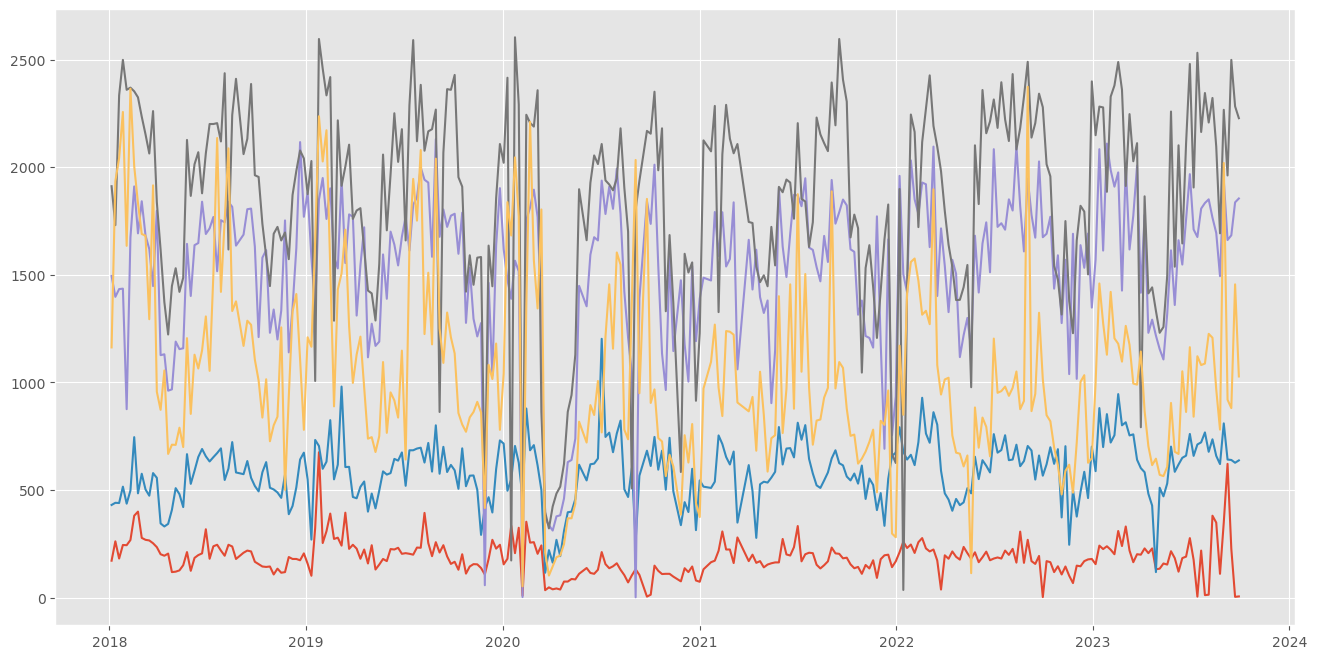

In [495]:
fig, ax = plt.subplots(figsize= (16,8))
for group in pm4['Time'].unique():
    data = pm4[pm4['Time']==group]
    ax.plot('COUNTDATE', 'Count', data = data)

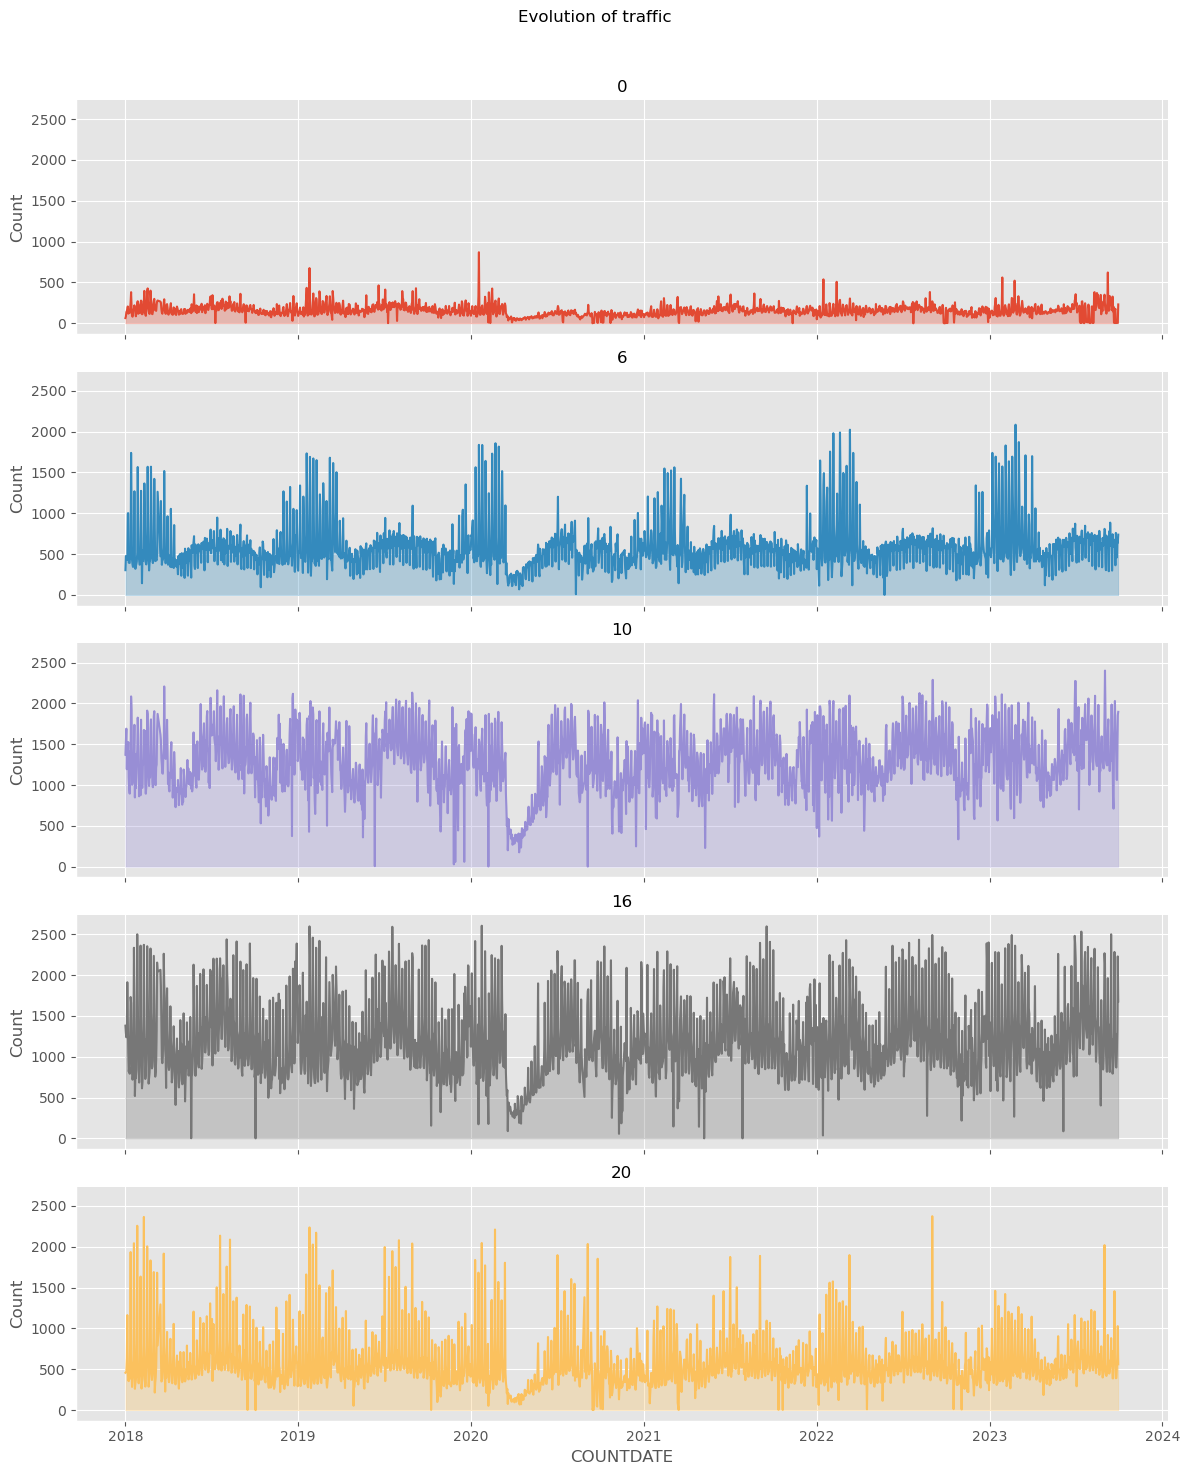

In [369]:
# libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

 
# Create a grid : initialize it
g = sns.FacetGrid(West_timeseries, height = 3, aspect = 4, col='Time', hue='Time', col_wrap=1, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'COUNTDATE', 'Count')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'COUNTDATE', 'Count', alpha=0.3).set_titles("{col_name} country")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top= .92)
g = g.fig.suptitle('Evolution of traffic')

# Show the graph
plt.show()

In [424]:
means = West_timeseries.groupby(['Year', 'Month', 'Weekday']).mean()
means.columns
means['Day'] = means.index
#means.index = range(0,483)
means.index = range(0,483)
days = list(means.Day)
days_ = list(zip(*days))
years = days_[0]

C:\Users\Natalie\AppData\Local\Temp\ipykernel_24004\3611139525.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



(2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,

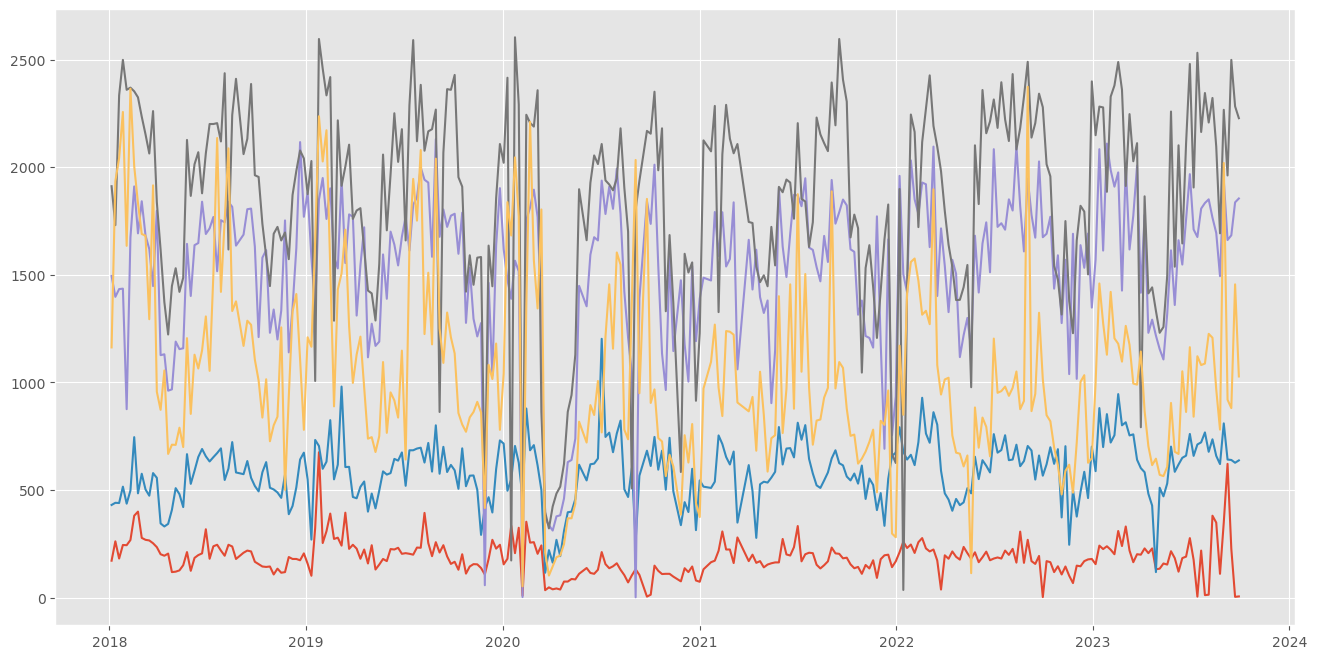

C:\Users\Natalie\AppData\Local\Temp\ipykernel_24004\1863779807.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



KeyError: "['COUNTDATE'] not found in axis"

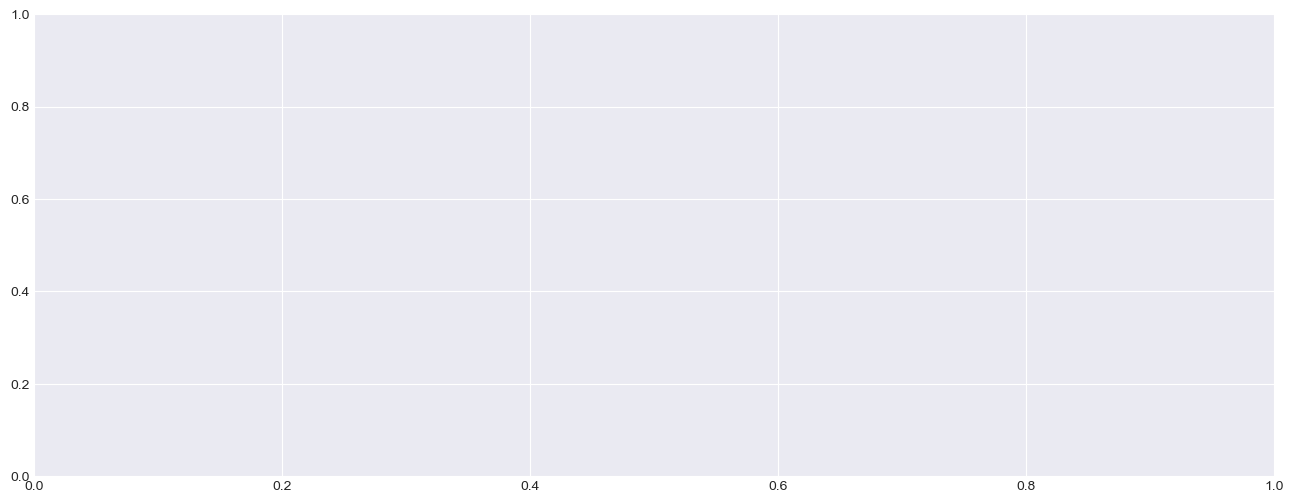

In [734]:
 
# Change the style of plot
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize= (16,6))
# Create a color palette
palette = plt.get_cmap('Set1')
 
# Plot multiple lines
num=0
for column in Timeseries.drop(['COUNTDATE', 'Date' ,'Time', 'Weekday'], axis=1):
    num+=1
    plt.plot(Timeseries['COUNTDATE'], Timeseries[column], marker='', color=palette(num), linewidth=.5, alpha=0.5, label=column)

# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title('East and West traffic counts')
plt.xlabel("Time")
plt.ylabel("Count")

plt.show()

In [818]:
Timeseries

Date  Time  Count_W  Count_E   Weekday      Month  Year
COUNTDATE                                                               
2018-01-01   1/1/2018     0       64       91    Monday    January  2018
2018-01-01   1/1/2018     6      304      473    Monday    January  2018
2018-01-01   1/1/2018    10     1371     2621    Monday    January  2018
2018-01-01   1/1/2018    16     1380     2032    Monday    January  2018
2018-01-01   1/1/2018    20      457      835    Monday    January  2018
...               ...   ...      ...      ...       ...        ...   ...
2023-09-30  9/30/2023     0      231      112  Saturday  September  2023
2023-09-30  9/30/2023     6      739      441  Saturday  September  2023
2023-09-30  9/30/2023    10     1896     1558  Saturday  September  2023
2023-09-30  9/30/2023    16     1677     2189  Saturday  September  2023
2023-09-30  9/30/2023    20      561      909  Saturday  September  2023

[10185 rows x 7 columns]

C:\Users\Natalie\AppData\Local\Temp\ipykernel_24004\2668888538.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Time     Count_W     Count_E
Year Month                                  
2018 April      10.4  617.826667  634.226667
     Auguest    10.4  869.960000  855.946667
     December   10.4  790.387097  741.032258
     February   10.4  817.621429  782.028571
     January    10.4  788.032258  787.070968
...              ...         ...         ...
2023 July       10.4  922.855172  969.103448
     June       10.4  817.480000  792.820000
     March      10.4  852.489655  801.572414
     May        10.4  644.967742  624.774194
     September  10.4  858.953333  827.393333

[69 rows x 3 columns]

In [827]:
df_test = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df_test

Date   AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  \
0    2015-02-17  127.489998  128.880005  126.919998  127.830002     63152400   
1    2015-02-18  127.629997  128.779999  127.449997  128.720001     44891700   
2    2015-02-19  128.479996  129.029999  128.330002  128.449997     37362400   
3    2015-02-20  128.619995  129.500000  128.050003  129.500000     48948400   
4    2015-02-23  130.020004  133.000000  129.660004  133.000000     70974100   
..          ...         ...         ...         ...         ...          ...   
501  2017-02-10  132.460007  132.940002  132.050003  132.119995     20065500   
502  2017-02-13  133.080002  133.820007  132.750000  133.289993     23035400   
503  2017-02-14  133.470001  135.089996  133.250000  135.020004     32815500   
504  2017-02-15  135.520004  136.270004  134.619995  135.509995     35501600   
505  2017-02-16  135.669998  135.899994  134.839996  135.350006     22118000   

     AAPL.Adjusted          dn        mavg          up   direction  
0       122.905254  106.741052  117.927667  129.114281  Increasing  
1       123.760965  107.842423  118.940333  130.038244  Increasing  
2       123.501363  108.894245  119.889167  130.884089  Decreasing  
3       124.510914  109.785449  120.763500  131.741551  Increasing  
4       127.876074  110.372516  121.720167  133.067817  Increasing  
..             ...         ...         ...         ...         ...  
501     132.119995  114.494004  124.498666  134.503328  Decreasing  
502     133.289993  114.820798  125.205166  135.589534  Increasing  
503     135.020004  115.175718  125.953499  136.731280  Increasing  
504     135.509995  115.545035  126.723499  137.901963  Decreasing  
505     135.350006  116.203299  127.504333  138.805366  Decreasing  

[506 rows x 11 columns]

In [ ]:
fig2 = go.Figure([go.Scatter(x=df_test['Date'], y=df_test['AAPL.High'])])
fig2.show()

In [830]:
import plotly.graph_objects as go
fig = go.Figure([go.Scatter(x=Timeseries.index, y=Timeseries.Count_W)])
fig.show()

In [869]:
fig3 = go.Figure()


fig3.add_trace(go.Scatter(x=Timeseries.index, y=Timeseries.Count_E,
                    mode='lines',
                    name='East',
                    line_color = 'purple'))
fig3.add_trace(go.Scatter(x=Timeseries.index, y=Timeseries.Count_W,
                    mode='lines',
                    name='West',
                    line_color = 'olive'))

fig3.update_layout(width = 1000, title = 'Traffic Volume Counts at the Eisenhower Tunnel I-70 CO')
fig3.update_yaxes(title = 'Traffic Count (per hour)')
fig3.update_xaxes(title = 'Date')
fig3.show()

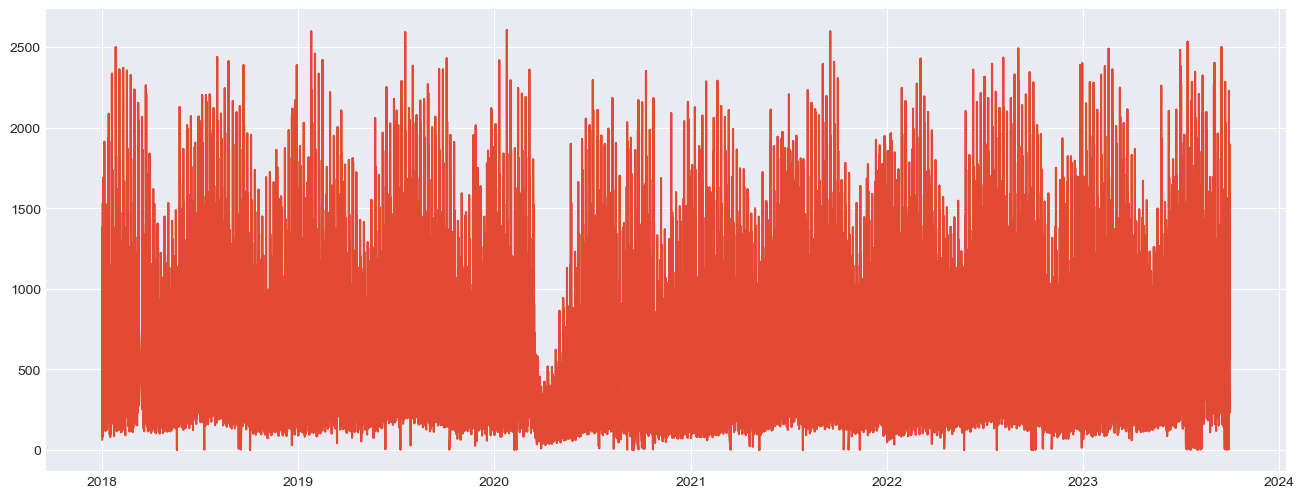

In [819]:
fig, ax = plt.subplots(figsize= (16,6))

ax.plot(Timeseries.index, Timeseries.Count_W)

In [533]:
timeseries = {'Date' : listdate_, 'Time' : time, 'Count_W' : hours_ , 'Count_E' : hours_E , 'Weekday' : weekday}
Timeseries = pd.DataFrame(timeseries)
Timeseries['COUNTDATE'] = pd.to_datetime(Timeseries['Date'], infer_datetime_format = True)
Timeseries = Timeseries.sort_values(['COUNTDATE', 'Time'])
Timeseries = Timeseries.set_index('COUNTDATE')
Timeseries['Month'] = Timeseries.index.month
Timeseries['Year'] = Timeseries.index.year
Timeseries

Date  Time  Count_W  Count_E  Weekday  Month  Year
COUNTDATE                                                          
2018-01-01   1/1/2018     0       64       91        0      1  2018
2018-01-01   1/1/2018     6      304      473        0      1  2018
2018-01-01   1/1/2018    10     1371     2621        0      1  2018
2018-01-01   1/1/2018    16     1380     2032        0      1  2018
2018-01-01   1/1/2018    20      457      835        0      1  2018
...               ...   ...      ...      ...      ...    ...   ...
2023-09-30  9/30/2023     0      231      112        5      9  2023
2023-09-30  9/30/2023     6      739      441        5      9  2023
2023-09-30  9/30/2023    10     1896     1558        5      9  2023
2023-09-30  9/30/2023    16     1677     2189        5      9  2023
2023-09-30  9/30/2023    20      561      909        5      9  2023

[10185 rows x 7 columns]

In [577]:
dict = {1 : 'January', 2 : 'February', 3 : 'March', 4: 'April', 5 : 'May', 6 : 'June', 7 : 
        'July', 8 : 'Auguest', 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December'}
dict2 = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday',  3: 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
Timeseries = Timeseries.replace({"Month": dict})
Timeseries = Timeseries.replace({"Weekday": dict2})

In [588]:
Timeseries_W = Timeseries[['Date','Time','Count_W','Weekday','Month','Year']]
Timeseries_E = Timeseries[['Date','Time','Count_E','Weekday','Month','Year']]
Timeseries_W = Timeseries_W.loc[Timeseries_W.Weekday == 'Friday']
Timeseries_E = Timeseries_E.loc[Timeseries_E.Weekday == 'Friday']
Timeseries_W['date'] = pd.to_datetime(Timeseries_W['Date'], infer_datetime_format = True)
Timeseries_E['date'] = pd.to_datetime(Timeseries_E['Date'], infer_datetime_format = True)

Timeseries_W

Date  Time  Count_W Weekday      Month  Year       date
COUNTDATE                                                               
2018-01-05   1/5/2018     0      172  Friday    January  2018 2018-01-05
2018-01-05   1/5/2018     6      431  Friday    January  2018 2018-01-05
2018-01-05   1/5/2018    10     1495  Friday    January  2018 2018-01-05
2018-01-05   1/5/2018    16     1912  Friday    January  2018 2018-01-05
2018-01-05   1/5/2018    20     1163  Friday    January  2018 2018-01-05
...               ...   ...      ...     ...        ...   ...        ...
2023-09-29  9/29/2023     0        6  Friday  September  2023 2023-09-29
2023-09-29  9/29/2023     6      638  Friday  September  2023 2023-09-29
2023-09-29  9/29/2023    10     1855  Friday  September  2023 2023-09-29
2023-09-29  9/29/2023    16     2228  Friday  September  2023 2023-09-29
2023-09-29  9/29/2023    20     1028  Friday  September  2023 2023-09-29

[1465 rows x 7 columns]

In [566]:
# Shades of gray
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

# Colors used to shade countries
COLOR_SCALE = [
    "#7F3C8D", # ARG
    "#11A579", # BRA
    "#3969AC", # CHE
    "#F2B701", # DNK
    "#E73F74", # EUZ
    "#80BA5A", # GBR
    "#E68310", # SWE
    GREY50     # USA
]

# Vertical lines every 5 years
VLINES = np.arange(2018, 2024, 1)

Text(2024, 2000, '20')

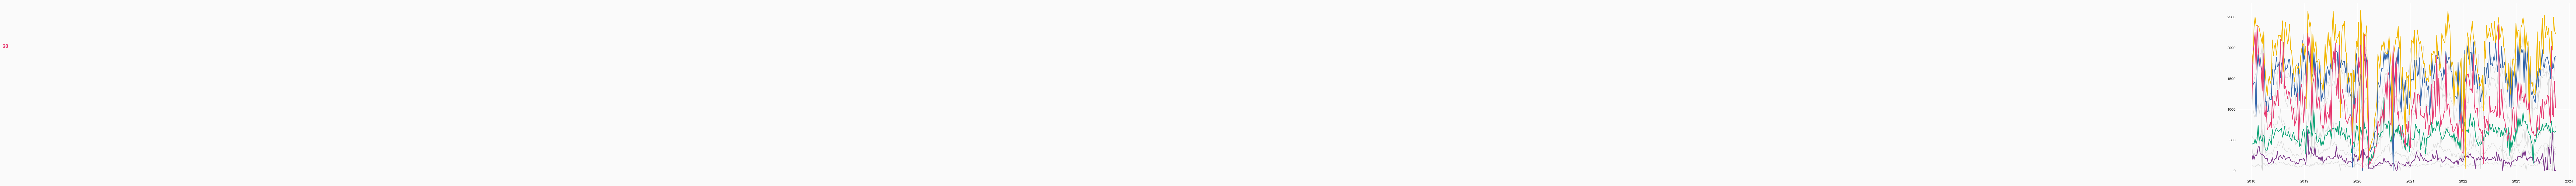

In [625]:
# Initialize layout ----------------------------------------------
fig, ax = plt.subplots(figsize = (16, 8.5))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

# Vertical lines used as scale reference
#3for h in VLINES:
 #   ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
#ax.hlines(y=np.arange(0, 3000), xmin=2018, xmax=2024, color=GREY91, lw=0.6)

# Darker horizontal line at y=0
#ax.hlines(y=0, xmin=2018, xmax=2024, color=GREY60, lw=0.8)

# Vertical like at x = 2008
#ax.axvline(2020, color=GREY40, ls="dotted")

#Annotations indicating the meaning of the vertical line
#ax.text(2020, -3.35, "Covid", fontname="Montserrat", 
 #       fontsize=14, fontweight=500, color=GREY40, ha="left")

# Add lines ------------------------------------------------------
# Create one data frame for the highlighted countries, and other
# for non-highlighted countries.
#df_highlight = Timeseries[Timeseries["Count_W"] != "other"]
#df_others = df_mac_indexed_2008[df_mac_indexed_2008["group"] == "other"]

for group in Timeseries_E["Time"].unique():
    data = Timeseries_E[Timeseries_E["Time"] == group]
    ax.plot("date", "Count_E", c=GREY75, lw=1.2, alpha=0.5, data=data)

for idx, group in enumerate(Timeseries_W["Time"].unique()):
    data = Timeseries_W[Timeseries_W["Time"] == group]
    color = COLOR_SCALE[idx]
    ax.plot("date", "Count_W", color=color, lw=1.8, data=data)
    
for idx, group in enumerate(Timeseries_W["Time"].unique()):
    data = Timeseries_W[(Timeseries_W["Time"] == group)]
    color = COLOR_SCALE[idx]
    
text = data["Time"].values[0]
    
ax.text(x = 2024,
        y = 2000,
        s = text,
        color=color, 
        fontsize=14, 
        weight="bold")

In [575]:
1 + 1

2

In [ ]:
Group_Time.plot.bar( x = 'Day', y = )

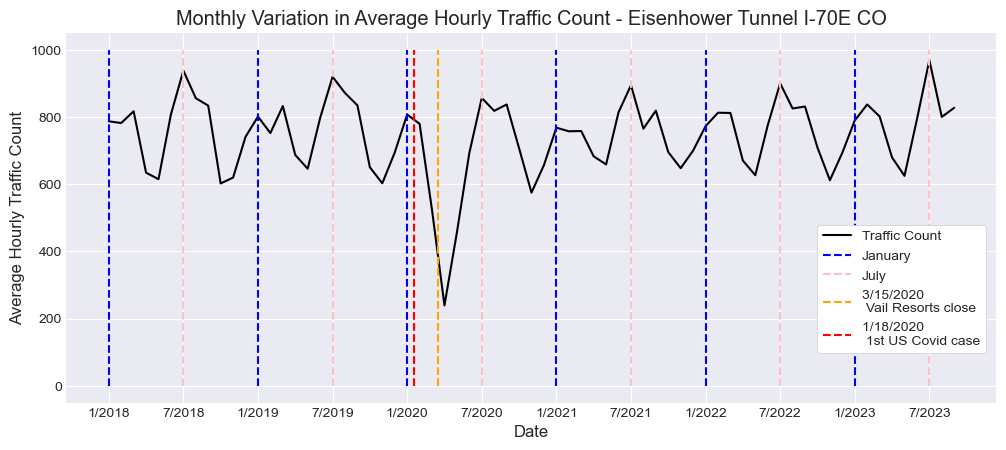

In [868]:
plt.figure().set_figwidth(12)
a = range(0,69)
plt.plot(a,'Count_E', data = Group_Time, color = '0', label = 'Traffic Count')
plt.xlabel('Date')
plt.ylabel('Average Hourly Traffic Count')
plt.xticks(range(0,70,6))
plt.title('Monthly Variation in Average Hourly Traffic Count - Eisenhower Tunnel I-70E CO')
ax.grid(True, linestyle='-.')
plt.vlines([0, 12, 24, 36, 48, 60], 0, 1000, linestyles='--', colors='blue', label = 'January')
plt.vlines([6, 18, 30, 42, 54, 66], 0, 1000, linestyles='--', colors='pink', label = 'July')
plt.vlines(26.48, 0, 1000, linestyles='--', colors='orange', label = '3/15/2020 \n Vail Resorts close')
plt.vlines(24.58, 0, 1000, linestyles='--', colors='red', label = '1/18/2020 \n 1st US Covid case')
plt.legend(frameon = True, framealpha = 1, facecolor = 'w', bbox_to_anchor = (.8, .5), loc = 'upper left')
plt.xticks(ticks=[0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66], 
           labels=['1/2018', '7/2018', '1/2019', '7/2019','1/2020', '7/2020','1/2021', '7/2021',
                   '1/2022', '7/2022','1/2023', '7/2023'])
plt.show()

In [733]:
Group_Time

Time     Count_W     Count_E   Weekday
Year Month                                        
2018 1      10.4  788.032258  787.070968  2.806452
     2      10.4  817.621429  782.028571  3.000000
     3      10.4  895.130769  816.907692  3.230769
     4      10.4  617.826667  634.226667  3.000000
     5      10.4  633.187097  614.838710  2.903226
...          ...         ...         ...       ...
2023 5      10.4  644.967742  624.774194  2.806452
     6      10.4  817.480000  792.820000  3.033333
     7      10.4  922.855172  969.103448  3.241379
     8      10.4  852.774194  800.258065  2.903226
     9      10.4  858.953333  827.393333  3.100000

[69 rows x 4 columns]

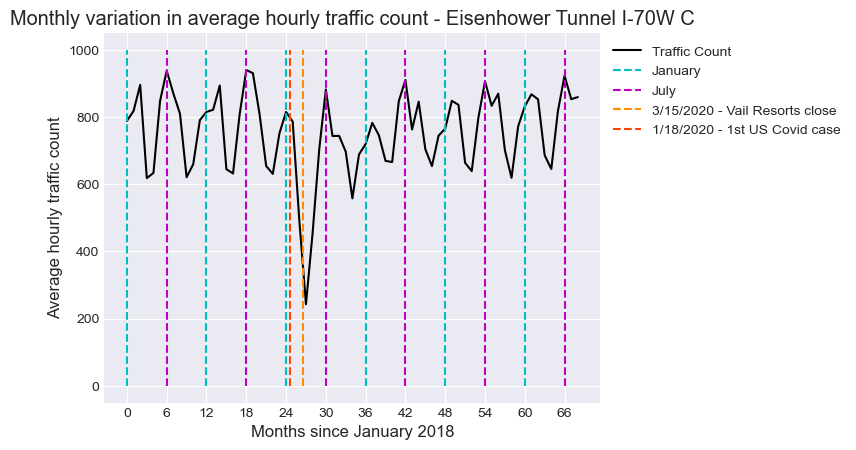

In [674]:
a = range(0,69)
plt.plot(a, 'Count_W', data = Group_Time, color = '0', label = 'Traffic Count')
plt.xlabel('Months since January 2018')
plt.ylabel('Average hourly traffic count')
plt.xticks(range(0,70,6))
plt.title('Monthly variation in average hourly traffic count - Eisenhower Tunnel I-70W C')
ax.grid(True, linestyle='-.')
plt.vlines([0, 12, 24, 36, 48, 60], 0, 1000, linestyles='--', colors='c', label = 'January')
plt.vlines([6, 18, 30, 42, 54, 66], 0, 1000, linestyles='--', colors='m', label = 'July')
plt.vlines(26.48, 0, 1000, linestyles='--', colors='darkorange', label = '3/15/2020 - Vail Resorts close')
plt.vlines(24.58, 0, 1000, linestyles='--', colors='orangered', label = '1/18/2020 - 1st US Covid case')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
plt.show()

In [526]:
Timeseries = Timeseries.set_index('COUNTDATE')
Timeseries['Month'] = Timeseries.index.month
Timeseries['Year'] = Timeseries.index.year
Timeseries

Date  Time  Count_W  Count_E  Weekday  Month  Year
COUNTDATE                                                          
2018-01-01   1/1/2018     0       64       91        0      1  2018
2018-01-01   1/1/2018     6      304      473        0      1  2018
2018-01-01   1/1/2018    10     1371     2621        0      1  2018
2018-01-01   1/1/2018    16     1380     2032        0      1  2018
2018-01-01   1/1/2018    20      457      835        0      1  2018
...               ...   ...      ...      ...      ...    ...   ...
2023-09-30  9/30/2023     0      231      112        5      9  2023
2023-09-30  9/30/2023     6      739      441        5      9  2023
2023-09-30  9/30/2023    10     1896     1558        5      9  2023
2023-09-30  9/30/2023    16     1677     2189        5      9  2023
2023-09-30  9/30/2023    20      561      909        5      9  2023

[10185 rows x 7 columns]

In [555]:
Group_Time = Timeseries.groupby(['Year', 'Month']).agg('mean')
Group_Time.head(50)
#Timeseries['COUNTDATE'] = pd.to_datetime(Timeseries['Date'], infer_datetime_format = True)

C:\Users\Natalie\AppData\Local\Temp\ipykernel_24004\4031827295.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Time     Count_W     Count_E   Weekday
Year Month                                        
2018 1      10.4  788.032258  787.070968  2.806452
     2      10.4  817.621429  782.028571  3.000000
     3      10.4  895.130769  816.907692  3.230769
     4      10.4  617.826667  634.226667  3.000000
     5      10.4  633.187097  614.838710  2.903226
     6      10.4  847.386667  807.873333  3.100000
     7      10.4  937.329032  938.000000  2.935484
     8      10.4  869.960000  855.946667  2.966667
     9      10.4  809.486667  833.820000  3.166667
     10     10.4  620.516129  602.154839  2.806452
     11     10.4  659.240000  619.740000  3.033333
     12     10.4  790.387097  741.032258  3.064516
2019 1      10.4  815.019355  801.180645  2.903226
     2      10.4  821.292857  752.100000  3.000000
     3      10.4  893.450000  832.508333  3.458333
     4      10.4  644.293333  687.033333  2.833333
     5      10.4  631.632258  645.858065  3.000000
     6      10.4  807.526667  796.986667  3.166667
     7      10.4  939.522581  919.651613  2.806452
     8      10.4  930.090323  871.419355  3.096774
     9      10.4  808.666667  834.633333  3.000000
     10     10.4  653.926667  650.533333  2.900000
     11     10.4  630.406667  602.600000  3.100000
     12     10.4  751.193548  694.277419  2.935484
2020 1      10.4  814.696774  807.232258  3.000000
     2      10.4  786.117241  779.662069  3.068966
     3      10.4  491.946667  522.940000  2.833333
     4      10.4  242.551724  239.206897  3.034483
     5      10.4  454.006897  456.220690  3.172414
     6      10.4  703.060000  692.826667  2.833333
     7      10.4  881.683871  856.722581  3.000000
     8      10.4  743.104000  818.208000  3.480000
     9      10.4  743.633333  837.283333  3.208333
     10     10.4  696.473333  707.186667  3.100000
     11     10.4  557.592593  574.822222  3.074074
     12     10.4  688.293333  656.793333  2.900000
2021 1      10.4  719.172414  768.179310  3.172414
     2      10.4  782.356522  757.426087  3.434783
     3      10.4  745.250000  758.191667  2.708333
     4      10.4  669.193333  682.940000  3.033333
     5      10.4  665.600000  658.748387  3.064516
     6      10.4  846.713333  813.900000  2.900000
     7      10.4  910.096774  894.477419  3.096774
     8      10.4  762.477419  765.161290  2.935484
     9      10.4  845.373333  818.926667  2.966667
     10     10.4  704.160000  695.426667  3.233333
     11     10.4  653.613793  647.593103  2.896552
     12     10.4  744.187097  699.974194  3.000000
2022 1      10.4  765.032258  772.496774  3.064516
     2      10.4  847.835714  812.707143  3.000000

In [21]:
Pre_Eisenhower_West = Eisenhower_West.loc['2019-02-01':'2019-04-30']
Pre_Eisenhower_East = Eisenhower_East.loc['2019-02-01':'2019-04-30']

Post_Eisenhower_West = Eisenhower_West.loc['2023-02-01':'2023-04-30']
Post_Eisenhower_East = Eisenhower_East.loc['2023-02-01':'2023-04-30']

During_Eisenhower_West = Eisenhower_West.loc['2020-02-01':'2020-04-30']
During_Eisenhower_East = Eisenhower_East.loc['2020-02-01':'2020-04-30']

In [68]:
import scipy.stats
scipy.stats.ttest_ind(a.HOUR7, b.HOUR7)

Ttest_indResult(statistic=-0.9494511611586216, pvalue=0.34809273904695626)

In [222]:
scipy.stats.ttest_ind(a.HOUR7, b.HOUR7)

Ttest_indResult(statistic=-0.5770144820876706, pvalue=0.5658351145558196)

In [214]:
a.describe()

COUNTSTATIONID       HOUR0       HOUR1       HOUR2       HOUR3  \
count            35.0   35.000000   35.000000   35.000000   35.000000   
mean            106.0  162.471429  128.528571   89.857143   82.885714   
std               0.0   63.239036   47.776431   22.312148   18.382411   
min             106.0  101.500000   79.500000   57.000000   52.000000   
25%             106.0  117.000000   94.500000   73.250000   69.000000   
50%             106.0  138.000000  105.000000   81.500000   79.000000   
75%             106.0  173.500000  144.500000  108.750000   94.250000   
max             106.0  323.500000  253.500000  142.000000  129.000000   

            HOUR4       HOUR5        HOUR6        HOUR7        HOUR8  ...  \
count   35.000000   35.000000    35.000000    35.000000    35.000000  ...   
mean   103.285714  215.728571   632.257143  1158.228571  1326.642857  ...   
std     17.684858   48.533697   331.788876   365.235205   254.957597  ...   
min     56.500000  118.500000   334.000000   727.000000   893.000000  ...   
25%    102.000000  196.750000   435.500000   870.500000  1163.250000  ...   
50%    107.500000  215.000000   489.000000  1026.000000  1277.000000  ...   
75%    111.500000  227.000000   668.500000  1420.250000  1577.250000  ...   
max    125.000000  352.000000  1516.000000  1884.000000  1759.000000  ...   

            HOUR14       HOUR15       HOUR16       HOUR17       HOUR18  \
count    35.000000    35.000000    35.000000    35.000000    35.000000   
mean   1193.314286  1238.185714  1201.085714  1012.428571   853.728571   
std     366.460577   396.720918   434.559471   474.436944   437.511636   
min     781.000000   745.500000   707.000000   554.500000   455.500000   
25%     847.750000   891.500000   815.750000   643.750000   547.000000   
50%    1117.000000  1119.000000  1090.000000   856.000000   696.500000   
75%    1392.000000  1458.750000  1456.750000  1178.000000   942.000000   
max    2027.500000  2117.500000  2376.500000  2277.500000  2230.500000   

            HOUR19       HOUR20       HOUR21      HOUR22      HOUR23  
count    35.000000    35.000000    35.000000   35.000000   35.000000  
mean    734.000000   600.157143   461.842857  324.157143  235.342857  
std     406.757009   355.175842   259.932564  152.796422   92.540593  
min     384.500000   300.000000   238.000000  172.500000  124.000000  
25%     457.000000   380.500000   285.500000  226.250000  165.250000  
50%     595.000000   483.000000   368.000000  274.500000  203.500000  
75%     772.750000   667.500000   499.500000  367.750000  288.250000  
max    1882.500000  1777.500000  1328.000000  780.500000  466.500000  

[8 rows x 25 columns]

In [217]:
b.describe()

COUNTSTATIONID       HOUR0       HOUR1       HOUR2       HOUR3  \
count            35.0   35.000000   35.000000   35.000000   35.000000   
mean            106.0  146.400000  112.842857   90.957143   82.942857   
std               0.0   45.074089   30.882789   21.385252   15.266154   
min             106.0   94.000000   72.000000   59.500000   47.500000   
25%             106.0  112.500000   93.500000   78.000000   75.750000   
50%             106.0  124.000000  101.000000   86.500000   80.500000   
75%             106.0  173.500000  124.250000   99.250000   95.750000   
max             106.0  242.000000  212.500000  152.500000  113.000000   

            HOUR4       HOUR5        HOUR6        HOUR7        HOUR8  ...  \
count   35.000000   35.000000    35.000000    35.000000    35.000000  ...   
mean   116.457143  233.542857   691.571429  1209.414286  1356.742857  ...   
std     20.995578   66.883939   372.740194   376.856922   301.499594  ...   
min     63.500000  119.500000   295.500000   737.000000   776.000000  ...   
25%    109.250000  200.250000   468.000000   907.500000  1139.750000  ...   
50%    120.000000  222.000000   550.000000  1052.500000  1277.000000  ...   
75%    127.000000  249.750000   765.250000  1637.500000  1582.000000  ...   
max    156.000000  467.500000  1762.500000  1927.500000  1923.500000  ...   

            HOUR14       HOUR15       HOUR16       HOUR17       HOUR18  \
count    35.000000    35.000000    35.000000    35.000000    35.000000   
mean   1214.457143  1222.228571  1171.628571   992.242857   833.957143   
std     318.047961   363.626836   426.105851   417.663624   392.157782   
min     808.000000   717.000000   632.500000   558.000000   398.000000   
25%     899.750000   944.000000   923.750000   713.250000   599.750000   
50%    1218.000000  1135.000000  1033.000000   836.000000   698.500000   
75%    1482.500000  1451.500000  1349.000000  1206.500000   957.500000   
max    1778.000000  2129.000000  2370.000000  2210.500000  2073.000000   

            HOUR19       HOUR20      HOUR21      HOUR22      HOUR23  
count    35.000000    35.000000   35.000000   35.000000   35.000000  
mean    679.600000   535.885714  409.328571  289.657143  209.428571  
std     339.174968   248.580827  177.386664  108.568410   69.576253  
min     363.000000   296.500000  221.500000  168.000000  129.000000  
25%     464.750000   376.750000  303.500000  214.000000  163.250000  
50%     536.000000   445.500000  334.500000  251.500000  181.500000  
75%     779.500000   588.750000  446.000000  329.000000  245.750000  
max    1757.000000  1202.500000  951.000000  568.500000  375.000000  

[8 rows x 25 columns]

In [56]:
a = Pre_Eisenhower_West.groupby(['Month','Weekday']).mean()
b = Post_Eisenhower_West.groupby(['Month','Weekday']).mean()
c = During_Eisenhower_West.groupby(['Month','Weekday']).mean()
c

C:\Users\Natalie\AppData\Local\Temp\ipykernel_24004\110974560.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a = Pre_Eisenhower_West.groupby(['Month','Weekday']).mean()
C:\Users\Natalie\AppData\Local\Temp\ipykernel_24004\110974560.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b = Post_Eisenhower_West.groupby(['Month','Weekday']).mean()
C:\Users\Natalie\AppData\Local\Temp\ipykernel_24004\110974560.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns 

COUNTSTATIONID   HOUR0   HOUR1   HOUR2       HOUR3   HOUR4  \
Month Weekday                                                               
2     0                 106.0   99.75   83.75   78.50   83.250000  110.75   
      1                 106.0   96.50   62.00   72.00   73.750000   97.00   
      2                 106.0  127.25  121.75   72.00   79.250000  105.50   
      3                 106.0  231.00  217.75  110.50  100.250000  116.50   
      4                 106.0  219.25  313.00  118.50   81.750000  100.75   
      5                 106.0  328.20  230.20  129.40   94.800000  158.60   
      6                 106.0  176.00  113.00   70.00   65.750000   85.00   
3     0                 106.0   90.60   70.20   60.60   68.200000  101.40   
      1                 106.0   97.40   79.20   70.60   69.600000  101.60   
      2                 106.0  132.75   94.00   69.25   66.500000  114.25   
      3                 106.0  149.75  120.00   80.25   93.500000  106.50   
      4                 106.0  132.50  129.25   85.00   78.000000   95.75   
      5                 106.0  133.25  112.50   82.50   96.750000  100.75   
      6                 106.0   92.50   68.00   51.75   46.500000   53.50   
4     0                 106.0   52.25   33.50   33.00   47.000000   83.00   
      1                 106.0   62.00   58.00   45.00   55.666667   73.00   
      2                 106.0   55.20   47.60   49.80   53.200000   84.40   
      3                 106.0   61.80   56.20   53.40   66.400000   80.00   
      4                 106.0   48.75   49.50   45.50   48.500000   73.25   
      5                 106.0   55.50   48.50   36.00   55.750000   60.50   
      6                 106.0   40.75   32.75   27.50   31.000000   34.00   

                    HOUR5        HOUR6    HOUR7        HOUR8  ...   HOUR14  \
Month Weekday                                                 ...            
2     0        221.750000   476.750000   937.25   975.000000  ...   842.00   
      1        164.750000   359.250000   742.25  1060.750000  ...   738.50   
      2        208.750000   355.500000   957.50  1160.750000  ...  1036.75   
      3        211.000000   448.500000   912.25  1200.500000  ...  1201.50   
      4        185.000000   683.750000  1449.25  1423.000000  ...  1580.50   
      5        497.200000  1658.800000  1564.20  1603.800000  ...  1669.20   
      6        150.250000   834.750000  1304.00  1165.000000  ...  1211.75   
3     0        187.200000   340.600000   538.20   693.600000  ...   682.00   
      1        188.600000   328.400000   538.20   673.000000  ...   617.20   
      2        199.000000   340.750000   635.25   755.750000  ...   824.50   
      3        203.750000   357.250000   607.25   774.500000  ...   805.75   
      4        167.500000   362.750000   767.00   914.500000  ...  1026.75   
      5        215.250000   727.250000   941.50   856.000000  ...  1083.75   
      6        113.750000   409.500000   615.75   500.750000  ...   825.25   
4     0        159.000000   288.250000   349.25   414.250000  ...   352.00   
      1        140.666667   280.666667   354.00   368.666667  ...   338.00   
      2        153.000000   292.400000   398.60   401.400000  ...   395.00   
      3        143.600000   268.000000   328.00   328.400000  ...   380.60   
      4        129.000000   233.750000   287.75   334.000000  ...   490.25   
      5         93.750000   209.000000   255.00   328.000000  ...   449.50   
      6         71.500000   122.750000   164.50   225.250000  ...   383.75   

                    HOUR15       HOUR16       HOUR17       HOUR18  \
Month Weekday                                                       
2     0         801.250000   715.250000   563.000000   391.750000   
      1         887.000000   761.250000   622.250000   484.500000   
      2        1124.500000   981.000000   800.000000   641.500000   
      3        1368.750000  1330.500000  1157.000000  1082.500000   
      4        1749.750000  1704.0

In [52]:
month_ = (list(range(2,3))* 7) + (list(range(3,4))* 7)  + (list(range(4,5))* 7)
month_ = month_ * 24

In [169]:
days_ = list(range(7))
days_ = days_ * 72

hours_ = list(range(24))
hours_ = hours_ * 21
hours_.sort()

month_ = (list(range(2,3))* 7) + (list(range(3,4))* 7)  + (list(range(4,5))* 7)
month_ = month_ * 24

listPre = []
column = range(1,25)
for i in column:
    list1 = list(a.iloc[:,i])
    listPre += list1

listDur = []
column = range(1,25)
for i in column:
    list2 = list(c.iloc[:,i])
    listDur += list2
    
listPost = []
column = range(1,25)
for i in column:
    list3 = list(b.iloc[:,i])
    listPost += list3
    
dataPre = {'Month' : month_ , 'Weekday': days_ , 'Hour': hours_ , 'CountPre': listPre}
PreCovid = pd.DataFrame(dataPre)

dataDur = {'Month' : month_ , 'Weekday': days_ , 'Hour': hours_ , 'CountDur': listDur}
DurCovid = pd.DataFrame(dataDur)

dataPost = {'Month' : month_ , 'Weekday': days_ , 'Hour': hours_ , 'CountPost': listPost}
PostCovid = pd.DataFrame(dataPost)
PostCovid

All_Covid = pd.merge(PreCovid, DurCovid, on = ('Month', 'Weekday', 'Hour'))
All_Covid = pd.merge(All_Covid, PostCovid, on = ('Month', 'Weekday', 'Hour'))

In [180]:
dataPre2 = {'Month' : month_ , 'Weekday': days_ , 'Hour': hours_ , 'Time' : 'Pre', 'Count': listPre}
PreCovid2 = pd.DataFrame(dataPre2)

dataDur2 = {'Month' : month_ , 'Weekday': days_ , 'Hour': hours_ , 'Time' : 'During', 'Count': listDur}
DurCovid2 = pd.DataFrame(dataDur2)

dataPost2 = {'Month' : month_ , 'Weekday': days_ , 'Hour': hours_ , 'Time' : 'Post', 'Count': listPost}
PostCovid2 = pd.DataFrame(dataPost2)
PostCovid2

Month  Weekday  Hour  Time   Count
0        2        0     0  Post  111.25
1        2        1     0  Post  115.25
2        2        2     0  Post  124.50
3        2        3     0  Post  246.75
4        2        4     0  Post  243.75
..     ...      ...   ...   ...     ...
499      4        2    23  Post  210.00
500      4        3    23  Post  245.00
501      4        4    23  Post  220.75
502      4        5    23  Post  204.20
503      4        6    23  Post  192.20

[504 rows x 5 columns]

In [196]:
ALL_C.loc[ALL_C.Month == 3, ].describe()

Month     Weekday        Hour        Count
count  504.0  504.000000  504.000000   504.000000
mean     3.0    3.000000   11.500000   698.382804
std      0.0    2.001987    6.929064   516.995640
min      3.0    0.000000    0.000000    46.500000
25%      3.0    1.000000    5.750000   206.237500
50%      3.0    3.000000   11.500000   631.166667
75%      3.0    5.000000   17.250000  1077.625000
max      3.0    6.000000   23.000000  2018.200000

In [483]:
dict = {2 : 'February', 3 : 'March', 4: 'April'}
Covid_stacked =Covid_stacked.replace({"Month": dict})
Covid_stacked

Month  Weekday  Hour  Time   Count
0    February        0     0   Pre  128.25
1    February        1     0   Pre  115.25
2    February        2     0   Pre  130.50
3    February        3     0   Pre  231.00
4    February        4     0   Pre  306.75
..        ...      ...   ...   ...     ...
499     April        2    23  Post  210.00
500     April        3    23  Post  245.00
501     April        4    23  Post  220.75
502     April        5    23  Post  204.20
503     April        6    23  Post  192.20

[1512 rows x 5 columns]

In [489]:
Covid_stacked = pd.concat([PreCovid2, DurCovid2, PostCovid2], axis = 0)
dict = {2 : 'February', 3 : 'March', 4: 'April', 5 : 'May', 6 : 'June', 7 : 
        'July', 8 : 'Auguest', 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December'}
dict2 = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday',  3: 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
Covid_stacked =Covid_stacked.replace({"Month": dict})
Covid_stacked =Covid_stacked.replace({"Weekday": dict2})
Covid_stacked.head(30)

Month    Weekday  Hour Time       Count
0   February     Monday     0  Pre  128.250000
1   February    Tuesday     0  Pre  115.250000
2   February  Wednesday     0  Pre  130.500000
3   February   Thursday     0  Pre  231.000000
4   February     Friday     0  Pre  306.750000
5   February   Saturday     0  Pre  316.250000
6   February     Sunday     0  Pre  140.500000
7      March     Monday     0  Pre  122.000000
8      March    Tuesday     0  Pre  135.000000
9      March  Wednesday     0  Pre  150.333333
10     March   Thursday     0  Pre  145.000000
11     March     Friday     0  Pre  277.800000
12     March   Saturday     0  Pre  291.000000
13     March     Sunday     0  Pre  159.250000
14     April     Monday     0  Pre  118.600000
15     April    Tuesday     0  Pre  144.600000
16     April  Wednesday     0  Pre  125.000000
17     April   Thursday     0  Pre  160.250000
18     April     Friday     0  Pre  198.000000
19     April   Saturday     0  Pre  211.500000
20     April     Sunday     0  Pre  170.500000
21  February     Monday     1  Pre   97.000000
22  February    Tuesday     1  Pre   96.750000
23  February  Wednesday     1  Pre  107.500000
24  February   Thursday     1  Pre  185.750000
25  February     Friday     1  Pre  248.250000
26  February   Saturday     1  Pre  230.250000
27  February     Sunday     1  Pre   94.000000
28     March     Monday     1  Pre   98.666667
29     March    Tuesday     1  Pre  128.500000

In [492]:
fig = px.bar(Covid_stacked, x= "Hour", y= "Count", color= "Month", barmode="relative", facet_row="Time", facet_col="Weekday", 
            labels ={"Weekday": ""})
fig.show()

In [425]:
All_Covid

Month  Weekday  Hour  CountPre  CountDur  CountPost
0        2        0     0    128.25     99.75     111.25
1        2        1     0    115.25     96.50     115.25
2        2        2     0    130.50    127.25     124.50
3        2        3     0    231.00    231.00     246.75
4        2        4     0    306.75    219.25     243.75
..     ...      ...   ...       ...       ...        ...
499      4        2    23    156.75     76.60     210.00
500      4        3    23    276.25     65.60     245.00
501      4        4    23    320.00     63.25     220.75
502      4        5    23    229.50     55.50     204.20
503      4        6    23    208.25     55.00     192.20

[504 rows x 6 columns]

In [436]:
len(list(All_Covid.CountPre))

504

T-statistic: 47.25413862684758
P-value: 1.2439600150139229e-20
Mean groupA: 732.0465277777778
Mean groupB: 482.89408068783064
Mean groupC: 760.8950396825396


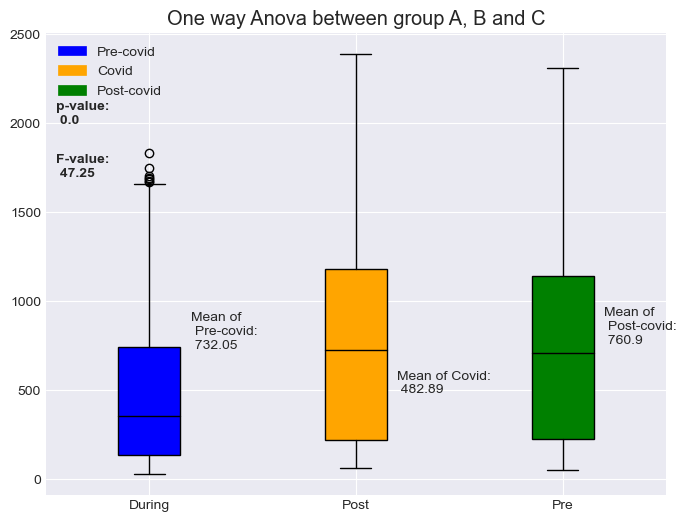

In [814]:
import scipy.stats as stats
sample_size = 504

Pre = np.array(All_Covid.CountPre)
During = np.array(All_Covid.CountDur)
Post = np.array(All_Covid.CountPost)

# Perform a paired t-test
F_statistic, p_value = stats.f_oneway(Pre, During, Post)

# Get means
mean_groupA = Pre.mean()
mean_groupB = During.mean()
mean_groupC = Post.mean()


category = ['Pre']*sample_size + ['During']*sample_size + ['Post']*sample_size

df = pd.DataFrame({'value': np.concatenate([groupA, groupB, groupC]),
                   'category': category})

# Print the results
print("T-statistic:", F_statistic)
print("P-value:", p_value)
print("Mean groupA:", mean_groupA)
print("Mean groupB:", mean_groupB)
print("Mean groupC:", mean_groupC)

F_statistic = round(F_statistic,2)
p_value = round(p_value,5) # more decimal since it's a lower value in general
mean_groupA = round(mean_groupA,2)
mean_groupB = round(mean_groupB,2)
mean_groupC = round(mean_groupC,2)

# Group our dataset with our 'Group' variable
grouped = df.groupby('category')['value']

# Init a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
boxplot = ax.boxplot(x=[group.values for name, group in grouped],
                     labels=grouped.groups.keys(),
                     patch_artist=True,
                     medianprops={'color': 'black'}
                    ) 

# Define colors for each group
colors = ['blue', 'orange', 'green']

# Assign colors to each box in the boxplot
for box, color in zip(boxplot['boxes'], colors):
    box.set_facecolor(color)
    
# Add the p value and the t
p_value_text = f'p-value:\n {p_value}'
ax.text(0.55, 2000, p_value_text, weight='bold')
f_value_text = f'F-value:\n {F_statistic}'
ax.text(.55, 1700, f_value_text, weight='bold')

# Add the mean for each group
ax.text(1.2,  mean_groupA, f'Mean of \n Pre-covid:\n {mean_groupA}', fontsize=10)
ax.text(2.2, mean_groupB, f'Mean of Covid:\n {mean_groupB}', fontsize=10)
ax.text(3.2, mean_groupC, f'Mean of \n Post-covid:\n {mean_groupC}', fontsize=10)

# Add a title and axis label
ax.set_title('One way Anova between group A, B and C')

# Add a legend
legend_labels = ['Pre-covid', 'Covid', 'Post-covid']
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels)

# Display it
plt.show()

In [476]:
import plotly.express as px
#Covid_stacked["Month"] = Covid_stacked["Month"].astype(str)

figtest = px.scatter_matrix(All_Covid, dimensions=['CountPre', 'CountDur', 'CountPost'], color= All_Covid.Month.astype(str))
figtest.show()

C:\Users\Natalie\anaconda3\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [77]:
scipy.stats.f_oneway(All_Covid.CountPre, All_Covid.CountPost, axis = 0)

F_onewayResult(statistic=0.7293181471974739, pvalue=0.39330759886861344)

In [328]:
scipy.stats.f_oneway(All_Covid.CountPre, All_Covid.CountDur, All_Covid.CountPost, axis = 0)

F_onewayResult(statistic=47.25413862684758, pvalue=1.2439600150139229e-20)

In [73]:
scipy.stats.ttest_ind(All_Covid.CountDur, All_Covid.CountPost)

Ttest_indResult(statistic=-9.088534242080486, pvalue=5.213127557576508e-19)

In [72]:
scipy.stats.ttest_ind(listPre, listPost)

Ttest_indResult(statistic=-0.8540012571404512, pvalue=0.393307598868762)

ValueError: List of violinplot statistics and `positions` values must have the same length

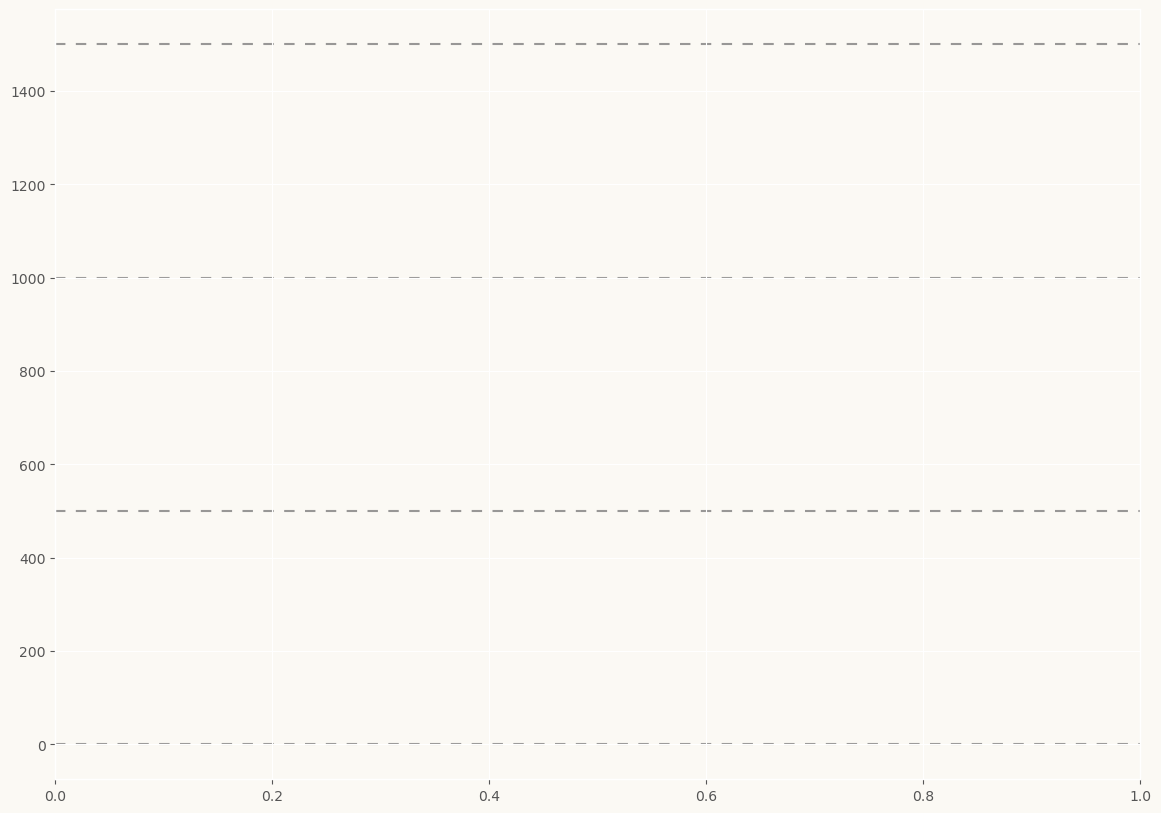

In [333]:
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = ["#1B9E77", "#D95F02", "#7570B3"]

# Horizontal positions for the violins. 
# They are arbitrary numbers. They could have been [-1, 0, 1] for example.
POSITIONS = ['Pre', 'During', 'Post']

# Horizontal lines
HLINES = [0, 500, 1000, 1500]
fig, ax = plt.subplots(figsize= (14, 10))

# Some layout stuff ----------------------------------------------
# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# Horizontal lines that are used as scale reference
for h in HLINES:
    ax.axhline(h, color=GREY50, ls=(0, (5, 5)), alpha=0.8, zorder=0)

# Add violins ----------------------------------------------------
# bw_method="silverman" means the bandwidth of the kernel density
# estimator is computed via Silverman's rule of thumb. 
# More on this in the bonus track ;)

# The output is stored in 'violins', used to customize their appearence

violins = ax.violinplot(
    Covid_stacked.Count, 
    positions = POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)
    
medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    Covid_stacked,
    positions=POSITIONS, 
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

In [330]:
All_Covid

Month  Weekday  Hour  CountPre  CountDur  CountPost
0        2        0     0    128.25     99.75     111.25
1        2        1     0    115.25     96.50     115.25
2        2        2     0    130.50    127.25     124.50
3        2        3     0    231.00    231.00     246.75
4        2        4     0    306.75    219.25     243.75
..     ...      ...   ...       ...       ...        ...
499      4        2    23    156.75     76.60     210.00
500      4        3    23    276.25     65.60     245.00
501      4        4    23    320.00     63.25     220.75
502      4        5    23    229.50     55.50     204.20
503      4        6    23    208.25     55.00     192.20

[504 rows x 6 columns]

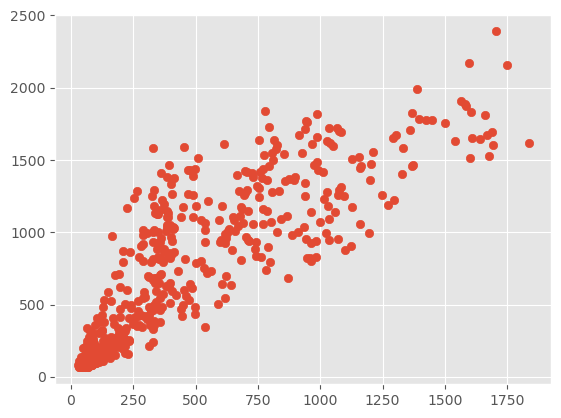

In [75]:
plt.scatter(All_Covid.CountDur, All_Covid.CountPost)

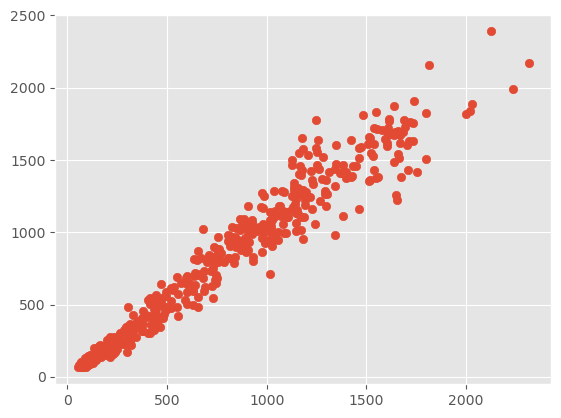

In [76]:
plt.scatter(All_Covid.CountPre, All_Covid.CountPost)

In [ ]:
plt.scatter(Pre_Eisenhower_West.HOUR17, Post_Eisenhower_West.HOUR17)
# need to do random sample for this one 

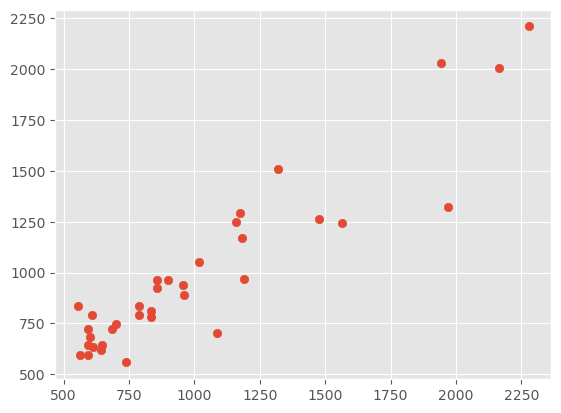

In [233]:
plt.scatter(a.HOUR17, b.HOUR17)

In [721]:
scipy.stats.ttest_ind(Timeseries["Count_W"], Timeseries["Count_E"])

Ttest_indResult(statistic=1.5489982119980865, pvalue=0.12139768658658392)

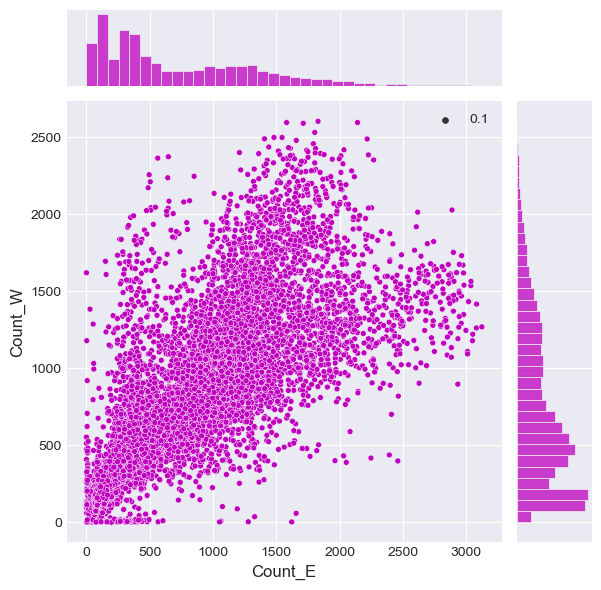

In [714]:
sns.jointplot(x=Timeseries["Count_E"], y=Timeseries["Count_W"], kind='scatter', color = 'm', size = .1)
plt.show()

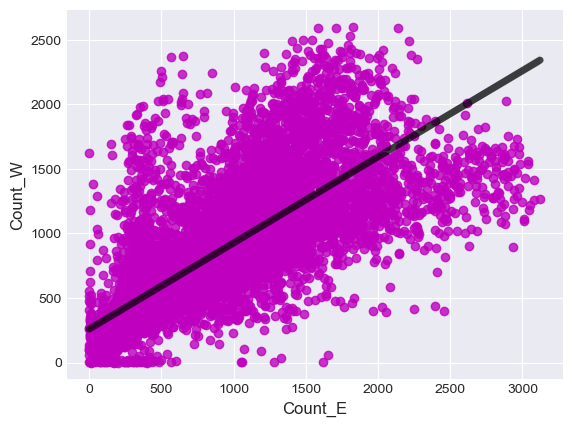

In [720]:
sns.regplot(x=Timeseries["Count_E"], y=Timeseries["Count_W"], color = 'm', line_kws={"color":"0","alpha":0.7,"lw":5})
plt.show()

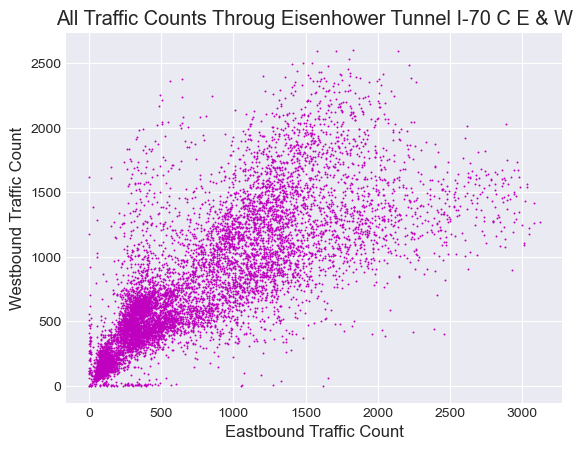

In [697]:
plt.scatter(Timeseries.Count_E, Timeseries.Count_W, s = .75, c = 'm')
plt.xlabel('Eastbound Traffic Count')
plt.ylabel('Westbound Traffic Count')
plt.title('All Traffic Counts Throug Eisenhower Tunnel I-70 C E & W')
ax.grid(True, linestyle='-.')
plt.show()

In [796]:
All_Seasons.loc[(All_Seasons.Weekday == 6), ].plot.bar(
      x = 'Hour', y = ['Count_ESki', 'Count_ESummer', 'Count_EShoulder'], 
    label = ['Ski Season \n (Dec/Jan/Feb/Mar)', 'Summer \n (June/July/Aug/Sept)', 'Shoulder Season \n (April/May/Oct/Nov)'],  
    color = ['blue','pink', 'brown'], 
    figsize = (12, 4), 
    width = .75, 
    edgecolor='white')
plt.title('Mean Traffic Volume Counts by Season - Sunday Eastbound', fontsize = 12)
plt.legend()
plt.ylabel('Total Count (per hour)')
plt.xlabel('24 hour clock (hours)')

NameError: name 'All_Seasons' is not defined

C:\Users\Natalie\AppData\Local\Temp\ipykernel_24004\3926852679.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 0, '24 hour clock (hours)')

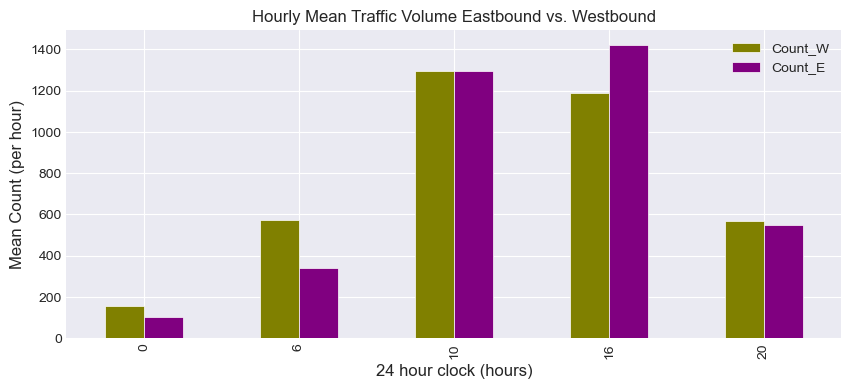

In [802]:
Timeseries.groupby('Time')['Count_W', 'Count_E'].mean().plot.bar(
    color = ['olive', 'purple'],
    figsize = (10, 4),
    width = .5,
    edgecolor = 'white')
plt.title('Hourly Mean Traffic Volume Eastbound vs. Westbound', fontsize = 12)
plt.legend()
plt.ylabel('Mean Count (per hour)')
plt.xlabel('24 hour clock (hours)')

C:\Users\Natalie\AppData\Local\Temp\ipykernel_24004\2020339064.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 0, 'Weekday')

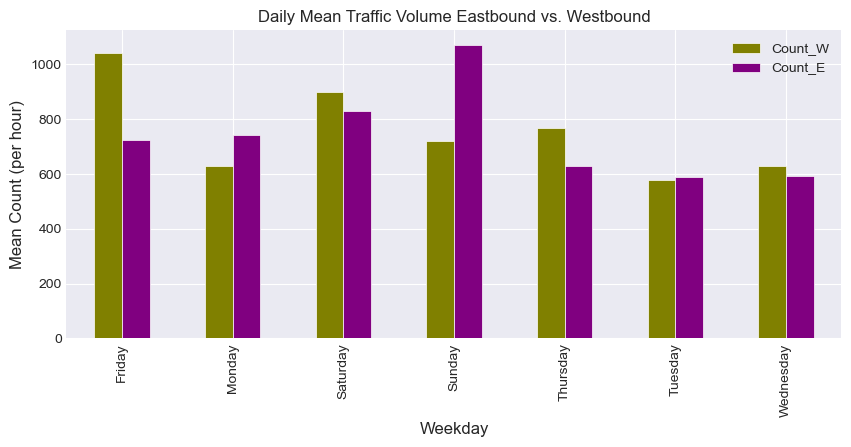

In [803]:
Timeseries.groupby('Weekday')['Count_W', 'Count_E'].mean().plot.bar(
    color = ['olive', 'purple'],
    figsize = (10, 4),
    width = .5,
    edgecolor = 'white')
plt.title('Daily Mean Traffic Volume Eastbound vs. Westbound', fontsize = 12)
plt.legend()
plt.ylabel('Mean Count (per hour)')
plt.xlabel('Weekday')

C:\Users\Natalie\AppData\Local\Temp\ipykernel_24004\2133676625.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 0, 'Month')

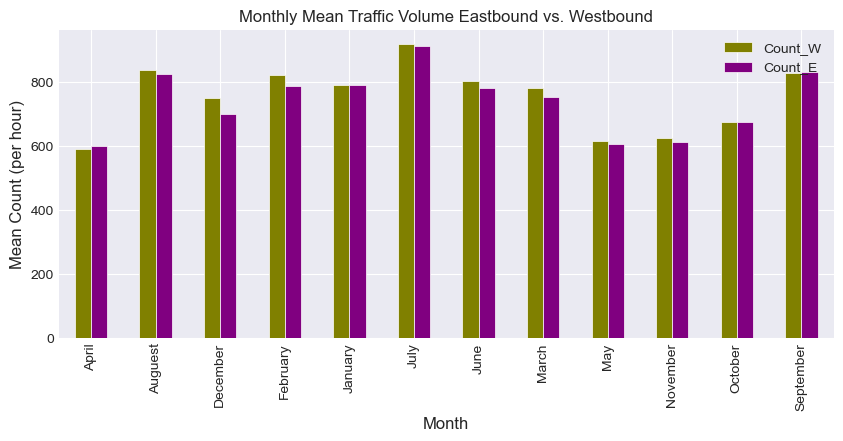

In [816]:
Timeseries.groupby('Month')['Count_W', 'Count_E'].mean().plot.bar(
    color = ['olive', 'purple'],
    figsize = (10, 4),
    width = .5,
    edgecolor = 'white')
plt.title('Monthly Mean Traffic Volume Eastbound vs. Westbound', fontsize = 12)
plt.legend()
plt.ylabel('Mean Count (per hour)')
plt.xlabel('Month')

<Axes: xlabel='Month,Weekday'>

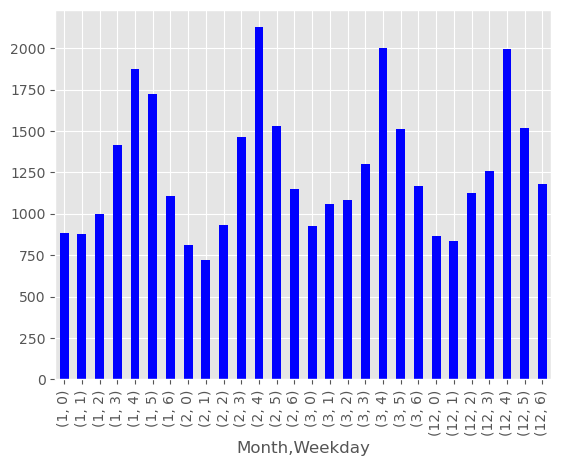

In [286]:
Pre_Eisenhower_West.groupby(['Month','Weekday'])['HOUR16'].mean().plot.bar(color = 'b')

<Axes: xlabel='Month,Weekday'>

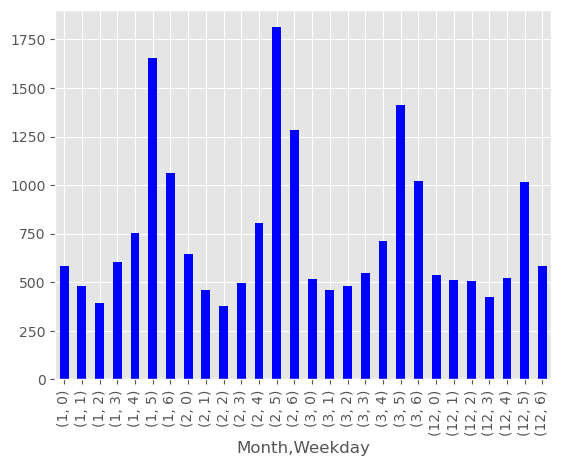

In [220]:
Post_Eisenhower_West.groupby(['Month','Weekday'])['HOUR6'].mean().plot.bar(color = 'b')

<Axes: xlabel='Weekday'>

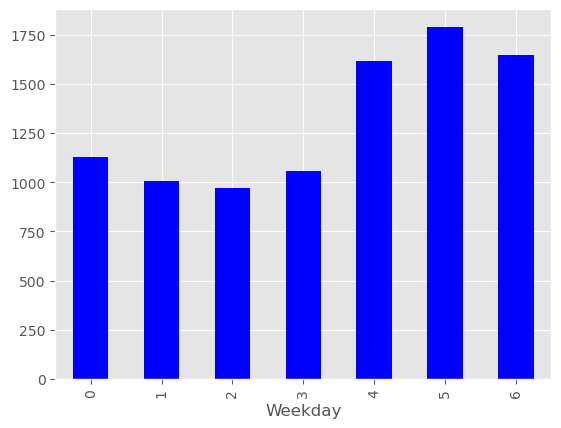

In [295]:
Post_Eisenhower_West.groupby('Weekday')['HOUR7'].median().plot.bar(color = 'b')

<Axes: xlabel='Weekday'>

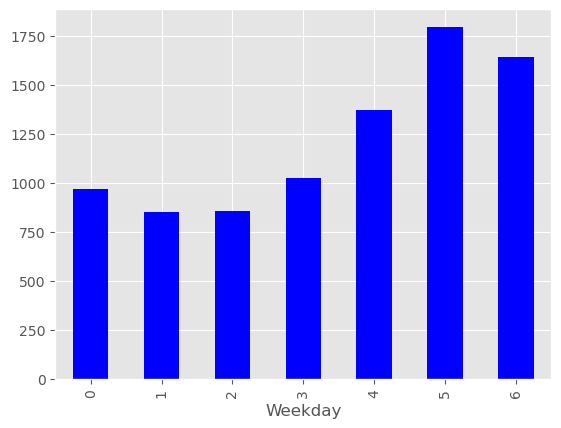

In [294]:
Pre_Eisenhower_West.groupby('Weekday')['HOUR7'].median().plot.bar(color = 'b')

In [84]:
testW = Eisenhower_West.loc[(Eisenhower_West.Month ==1) | (Eisenhower_West.Month == 2) | 
                           (Eisenhower_West.Month ==12) | (Eisenhower_West.Month ==3)]

test2W = testW.groupby('Weekday').mean()

testE = Eisenhower_East.loc[(Eisenhower_East.Month ==1) | (Eisenhower_East.Month == 2) | 
                           (Eisenhower_East.Month ==12) | (Eisenhower_East.Month ==3)]

test2E = testE.groupby('Weekday').mean()

test2E

C:\Users\Natalie\AppData\Local\Temp\ipykernel_24004\3910516494.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\Natalie\AppData\Local\Temp\ipykernel_24004\3910516494.py:9: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



COUNTSTATIONID       HOUR0      HOUR1      HOUR2      HOUR3  \
Weekday                                                                
0                 106.0   98.393617  70.180851  69.659574  79.180851   
1                 106.0   73.829787  56.978723  53.936170  61.904255   
2                 106.0   83.821053  61.894737  61.221053  68.157895   
3                 106.0   82.263736  65.494505  62.604396  72.285714   
4                 106.0   86.645833  68.208333  69.583333  75.093750   
5                 106.0   95.363636  76.585859  78.282828  77.565657   
6                 106.0  103.516129  75.150538  77.903226  83.462366   

              HOUR4       HOUR5       HOUR6       HOUR7        HOUR8  ...  \
Weekday                                                               ...   
0        124.819149  269.659574  567.595745  770.723404   951.617021  ...   
1         88.936170  168.500000  325.351064  500.882979   682.968085  ...   
2         96.631579  166.210526  310.873684  481.021053   665.800000  ...   
3         95.120879  159.087912  283.538462  446.791209   640.021978  ...   
4        100.218750  167.500000  301.354167  473.802083   701.135417  ...   
5         97.080808  166.949495  332.656566  552.464646   802.808081  ...   
6        109.301075  176.064516  361.344086  640.354839  1046.795699  ...   

              HOUR15       HOUR16       HOUR17       HOUR18       HOUR19  \
Weekday                                                                    
0        1584.202128  1493.117021  1201.563830   816.500000   557.914894   
1        1361.819149  1291.978723  1012.702128   651.457447   458.872340   
2        1361.842105  1250.831579   983.810526   678.989474   479.547368   
3        1462.010989  1432.076923  1129.450549   792.197802   555.560440   
4        1735.729167  1630.729167  1378.000000   992.166667   686.625000   
5        1986.686869  1799.363636  1575.767677  1209.737374   899.434343   
6        1865.774194  1762.462366  1612.731183  1433.172043  1243.032258   

             HOUR20      HOUR21      HOUR22      HOUR23     Month  
Weekday                                                            
0        382.765957  243.797872  156.446809  109.042553  4.319149  
1        334.329787  246.712766  163.212766  118.946809  4.297872  
2        352.926316  250.147368  169.294737  113.705263  4.168421  
3        393.725275  277.109890  183.285714  126.329670  4.274725  
4        490.489583  350.677083  222.500000  145.250000  4.291667  
5        631.080808  408.404040  265.050505  158.212121  4.222222  
6        903.817204  493.032258  243.193548  146.956989  4.290323  

[7 rows x 26 columns]

In [136]:
days = list(range(7))
days = days * 24
len(days)


168

In [137]:
hours = list(range(24))
hours = hours * 7
hours.sort()
hours

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 23,
 23]

In [134]:
listaW = []
column = range(1,25)
for i in column:
    listb = list(test2W.iloc[:,i])
    listaW += listb
listaW

[112.86170212765957,
 112.64893617021276,
 122.23157894736842,
 168.30769230769232,
 221.65625,
 246.8181818181818,
 133.27956989247312,
 92.42553191489361,
 93.69148936170212,
 99.08421052631579,
 136.2087912087912,
 185.02083333333334,
 182.97979797979798,
 93.97849462365592,
 74.34042553191489,
 77.02127659574468,
 76.13684210526316,
 96.45054945054945,
 116.72916666666667,
 112.3030303030303,
 68.45161290322581,
 78.03191489361703,
 73.91489361702128,
 78.8,
 89.17582417582418,
 99.33333333333333,
 94.39393939393939,
 61.43010752688172,
 116.81914893617021,
 110.06382978723404,
 111.14736842105263,
 115.89010989010988,
 124.07291666666667,
 112.97979797979798,
 71.89247311827957,
 217.38297872340425,
 199.48936170212767,
 206.3684210526316,
 217.67032967032966,
 220.20833333333334,
 307.64646464646466,
 158.18279569892474,
 490.70212765957444,
 428.70212765957444,
 431.36842105263156,
 472.38461538461536,
 605.3333333333334,
 1301.5555555555557,
 841.8817204301075,
 1030.2765957446

In [135]:
listaE = []
column = range(1,25)
for i in column:
    listc = list(test2E.iloc[:,i])
    listaE += listc
listaE

[98.3936170212766,
 73.82978723404256,
 83.82105263157895,
 82.26373626373626,
 86.64583333333333,
 95.36363636363636,
 103.51612903225806,
 70.18085106382979,
 56.97872340425532,
 61.89473684210526,
 65.49450549450549,
 68.20833333333333,
 76.58585858585859,
 75.15053763440861,
 69.65957446808511,
 53.93617021276596,
 61.22105263157895,
 62.604395604395606,
 69.58333333333333,
 78.28282828282828,
 77.90322580645162,
 79.18085106382979,
 61.90425531914894,
 68.15789473684211,
 72.28571428571429,
 75.09375,
 77.56565656565657,
 83.46236559139786,
 124.81914893617021,
 88.93617021276596,
 96.63157894736842,
 95.12087912087912,
 100.21875,
 97.08080808080808,
 109.3010752688172,
 269.6595744680851,
 168.5,
 166.21052631578948,
 159.0879120879121,
 167.5,
 166.94949494949495,
 176.06451612903226,
 567.5957446808511,
 325.3510638297872,
 310.87368421052633,
 283.53846153846155,
 301.3541666666667,
 332.65656565656565,
 361.3440860215054,
 770.7234042553191,
 500.8829787234043,
 481.02105263

In [138]:
dataW = {'Weekday': days, 'Hour': hours, 'Count': listaW}
dfW = pd.DataFrame(dataW)

dataE = {'Weekday': days, 'Hour': hours, 'Count': listaE}
dfE = pd.DataFrame(dataE)
dfE

Weekday  Hour       Count
0          0     0   98.393617
1          1     0   73.829787
2          2     0   83.821053
3          3     0   82.263736
4          4     0   86.645833
..       ...   ...         ...
163        2    23  113.705263
164        3    23  126.329670
165        4    23  145.250000
166        5    23  158.212121
167        6    23  146.956989

[168 rows x 3 columns]

<Axes: xlabel='Hour'>

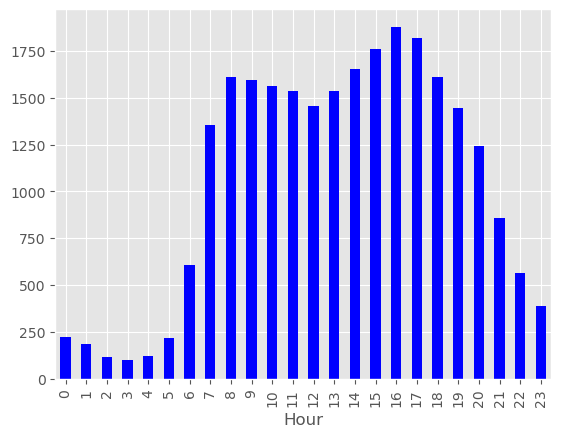

In [139]:
dfW.loc[dfW.Weekday == 4].groupby('Hour')['Count'].mean().plot.bar(color = 'b')

<Axes: xlabel='Hour'>

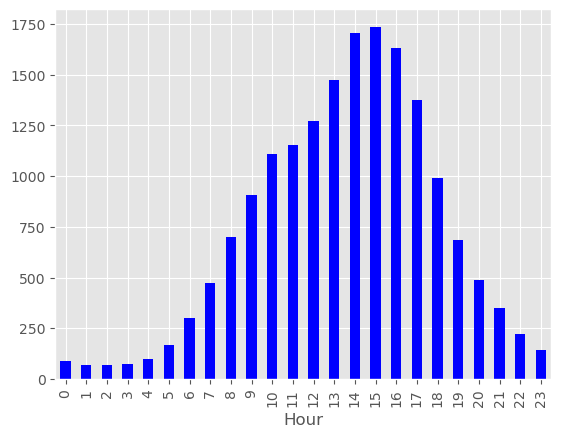

In [277]:
dfE.loc[dfE.Weekday == 4].groupby('Hour')['Count'].mean().plot.bar(color = 'b')

In [141]:
fig = px.scatter((dfW.loc[(dfW.Hour > 4) & (dfW.Hour < 21)]), x= 'Hour', y="Weekday", 
                 size="Count", color="Weekday", hover_name="Weekday")
fig.show()

In [201]:
Westbound = px.scatter(dfW, x="Hour", y="Count", color="Weekday",
           hover_name="Weekday", title = 'Westbound hourly mean traffic count by weekday')

Westbound.show()


In [202]:
fig = px.scatter(dfE, x="Hour", y="Count", color="Weekday",
           hover_name="Weekday")
fig.show()


In [291]:
fig = px.bar(dfW, x="Weekday", y="Count", color="Hour", barmode="group", title = 'Westbound ski season total mean traffic counts')
fig.show()

In [129]:
fig = px.bar(dfE, x="Weekday", y="Count", color="Hour", barmode="group", title = 'Eastbound ski season total mean traffic counts')
fig.show()

NameError: name 'dfE' is not defined

In [741]:
Eisenhower_West.iloc[:,2:26].sum(axis = 1)

COUNTDATE
2018-01-01    18214
2018-01-02    18807
2018-01-03    17093
2018-01-04    18758
2018-01-05    23505
              ...  
2023-09-26    13801
2023-09-27    15019
2023-09-28    18621
2023-09-29    27449
2023-09-30    24730
Length: 2037, dtype: int64

In [742]:
import plotly.express as px
fig = px.bar(Eisenhower_West, x="Weekday", y= Eisenhower_West.iloc[:,2:26].sum(axis = 1), color="Month", barmode="group")
fig.show()

In [743]:
import plotly.express as px
fig = px.bar(Eisenhower_East, x="Weekday", y=Eisenhower_East.iloc[:,2:26].sum(axis = 1), color="Month", barmode="group")
fig.show()

In [82]:
Eisenhower_East.shape

(2037, 29)

In [80]:
Eisenhower_East.groupby(['Month','Weekday']).min()

COUNTSTATIONID COUNTDIR  HOUR0  HOUR1  HOUR2  HOUR3  HOUR4  \
Month Weekday                                                               
1     0                   106        P     19     22     23     52     25   
      1                   106        P     40     35     33     32     49   
      2                   106        P     50     36     20     27     45   
      3                   106        P     17     38     41     25     56   
      4                   106        P     59     44     53     50     69   
...                       ...      ...    ...    ...    ...    ...    ...   
12    2                   106        P     57     44     36     42     42   
      3                   106        P      6      1      2     43     52   
      4                   106        P     48     42     26     48     49   
      5                   106        P     52     30     36     26     43   
      6                   106        P     61     43     30     42     46   

               HOUR5  HOUR6  HOUR7  ...  HOUR15  HOUR16  HOUR17  HOUR18  \
Month Weekday                       ...                                   
1     0            0    243      0  ...    1043    1051     716     466   
      1          102    185    327  ...     893     782     625     326   
      2           65    158    195  ...     424     593     163      71   
      3           41    149      9  ...     882     849     645     536   
      4          105    221    260  ...     381     837     720     630   
...              ...    ...    ...  ...     ...     ...     ...     ...   
12    2           79    123     33  ...     807     864     475     497   
      3          104    194    312  ...     950     867     461     473   
      4           62    116    204  ...     339     356     726     263   
      5           69    139      5  ...    1057    1032     518     165   
      6           77    129    218  ...     992     840     653     485   

               HOUR19  HOUR20  HOUR21  HOUR22  HOUR23  FormattedDate  
Month Weekday                                                         
1     0           303     254     180      98      57       1/1/2018  
      1           158     134      98      11      22       1/1/2019  
      2           263     221     154     123      80       1/1/2020  
      3           412     290     173     133      88      1/10/2019  
      4           390     323      71       9     105       1/1/2021  
...               ...     ...     ...     ...     ...            ...  
12    2           148       4      11       5       7      12/1/2021  
      3           315     234     168     124      70      12/1/2022  
      4           209     109     127      62      78     12/10/2021  
      5           331     246     170     142      88      12/1/2018  
      6           438     363     207     125      79      12/1/2019  

[84 rows x 27 columns]

In [102]:
test2E

COUNTSTATIONID       HOUR0      HOUR1      HOUR2      HOUR3  \
Weekday                                                                
0                 106.0   98.393617  70.180851  69.659574  79.180851   
1                 106.0   73.829787  56.978723  53.936170  61.904255   
2                 106.0   83.821053  61.894737  61.221053  68.157895   
3                 106.0   82.263736  65.494505  62.604396  72.285714   
4                 106.0   86.645833  68.208333  69.583333  75.093750   
5                 106.0   95.363636  76.585859  78.282828  77.565657   
6                 106.0  103.516129  75.150538  77.903226  83.462366   

              HOUR4       HOUR5       HOUR6       HOUR7        HOUR8  ...  \
Weekday                                                               ...   
0        124.819149  269.659574  567.595745  770.723404   951.617021  ...   
1         88.936170  168.500000  325.351064  500.882979   682.968085  ...   
2         96.631579  166.210526  310.873684  481.021053   665.800000  ...   
3         95.120879  159.087912  283.538462  446.791209   640.021978  ...   
4        100.218750  167.500000  301.354167  473.802083   701.135417  ...   
5         97.080808  166.949495  332.656566  552.464646   802.808081  ...   
6        109.301075  176.064516  361.344086  640.354839  1046.795699  ...   

              HOUR15       HOUR16       HOUR17       HOUR18       HOUR19  \
Weekday                                                                    
0        1584.202128  1493.117021  1201.563830   816.500000   557.914894   
1        1361.819149  1291.978723  1012.702128   651.457447   458.872340   
2        1361.842105  1250.831579   983.810526   678.989474   479.547368   
3        1462.010989  1432.076923  1129.450549   792.197802   555.560440   
4        1735.729167  1630.729167  1378.000000   992.166667   686.625000   
5        1986.686869  1799.363636  1575.767677  1209.737374   899.434343   
6        1865.774194  1762.462366  1612.731183  1433.172043  1243.032258   

             HOUR20      HOUR21      HOUR22      HOUR23     Month  
Weekday                                                            
0        382.765957  243.797872  156.446809  109.042553  4.319149  
1        334.329787  246.712766  163.212766  118.946809  4.297872  
2        352.926316  250.147368  169.294737  113.705263  4.168421  
3        393.725275  277.109890  183.285714  126.329670  4.274725  
4        490.489583  350.677083  222.500000  145.250000  4.291667  
5        631.080808  408.404040  265.050505  158.212121  4.222222  
6        903.817204  493.032258  243.193548  146.956989  4.290323  

[7 rows x 26 columns]

In [190]:
Eisenhower_West.loc[Eisenhower_West.Month == 3, ].describe()

COUNTSTATIONID       HOUR0       HOUR1       HOUR2       HOUR3  \
count           163.0  163.000000  163.000000  163.000000  163.000000   
mean            106.0  163.239264  124.067485   92.963190   85.196319   
std               0.0   71.105888   53.486716   33.310527   25.722368   
min             106.0    3.000000    5.000000    1.000000    2.000000   
25%             106.0  118.500000   87.500000   77.000000   69.500000   
50%             106.0  156.000000  115.000000   89.000000   83.000000   
75%             106.0  205.500000  153.000000  112.000000  102.000000   
max             106.0  395.000000  294.000000  201.000000  151.000000   

            HOUR4       HOUR5        HOUR6        HOUR7        HOUR8  ...  \
count  163.000000  163.000000   163.000000   163.000000   163.000000  ...   
mean   114.184049  220.828221   629.521472  1128.730061  1252.607362  ...   
std     34.490693   75.206185   383.818346   462.094868   437.347383  ...   
min     21.000000   51.000000   109.000000   183.000000   180.000000  ...   
25%     93.500000  177.000000   424.500000   853.500000  1085.000000  ...   
50%    121.000000  216.000000   508.000000  1084.000000  1316.000000  ...   
75%    130.000000  254.000000   714.500000  1519.000000  1525.500000  ...   
max    341.000000  534.000000  2024.000000  2025.000000  2270.000000  ...   

            HOUR16       HOUR17       HOUR18       HOUR19       HOUR20  \
count   163.000000   163.000000   163.000000   163.000000   163.000000   
mean   1218.380368  1071.834356   892.104294   730.981595   600.251534   
std     522.632855   527.036137   467.059155   410.191305   369.689882   
min      89.000000    90.000000   174.000000    98.000000     3.000000   
25%     900.000000   765.000000   584.000000   470.000000   383.500000   
50%    1167.000000   936.000000   798.000000   640.000000   516.000000   
75%    1535.000000  1303.500000  1063.000000   893.500000   714.500000   
max    2427.000000  2447.000000  2601.000000  2195.000000  1916.000000   

            HOUR21       HOUR22      HOUR23     Weekday  Month  
count   163.000000   163.000000  163.000000  163.000000  163.0  
mean    438.852761   317.711656  225.343558    2.975460    3.0  
std     237.697734   172.847064   99.209180    1.987464    0.0  
min       0.000000     1.000000    2.000000    0.000000    3.0  
25%     297.500000   227.000000  160.000000    1.000000    3.0  
50%     395.000000   290.000000  214.000000    3.000000    3.0  
75%     551.000000   396.500000  286.500000    5.000000    3.0  
max    1209.000000  1358.000000  521.000000    6.000000    3.0  

[8 rows x 27 columns]

In [118]:
Eisenhower_East.HOUR17.min()

0

In [116]:
(Eisenhower_East.loc[Eisenhower_East.Weekday == 6, ]).loc[Eisenhower_East.HOUR16 < 10]

Empty DataFrame
Columns: [COUNTSTATIONID, COUNTDIR, HOUR0, HOUR1, HOUR2, HOUR3, HOUR4, HOUR5, HOUR6, HOUR7, HOUR8, HOUR9, HOUR10, HOUR11, HOUR12, HOUR13, HOUR14, HOUR15, HOUR16, HOUR17, HOUR18, HOUR19, HOUR20, HOUR21, HOUR22, HOUR23, FormattedDate, Weekday, Month]
Index: []

[0 rows x 29 columns]

Text(0, 0.5, 'Count')

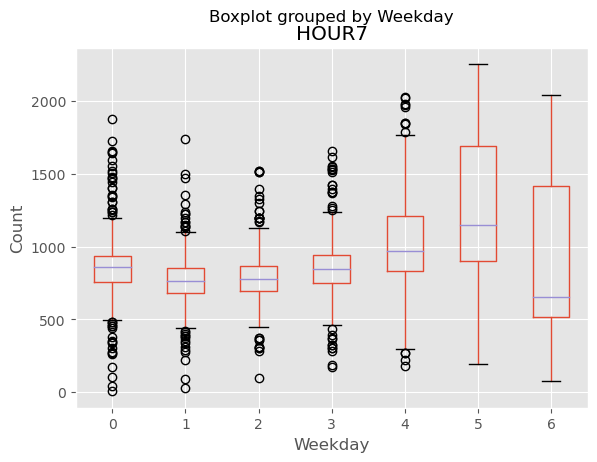

In [160]:
Box2 = Eisenhower_West[['Weekday', 'HOUR7']]
Box2.boxplot(by = 'Weekday', column = 'HOUR7')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

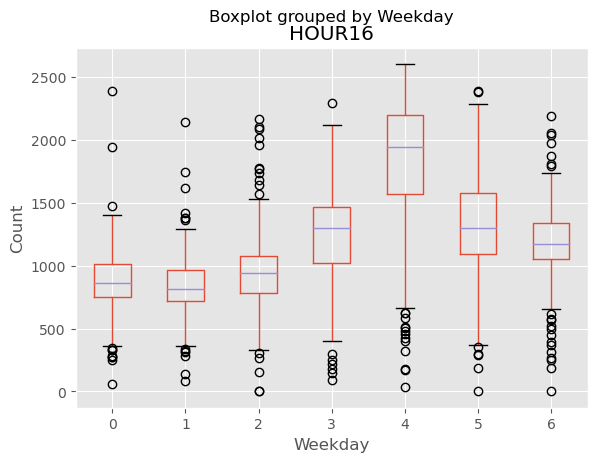

In [162]:
Box2 = Eisenhower_West[['Weekday', 'HOUR16']]
Box2.boxplot(by = 'Weekday', column = 'HOUR16')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

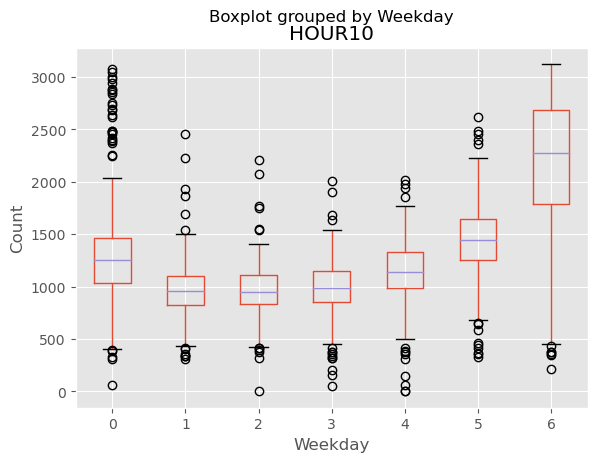

In [161]:
Box = Eisenhower_East[['Weekday', 'HOUR10']]
Box.boxplot(by = 'Weekday', column = 'HOUR10')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

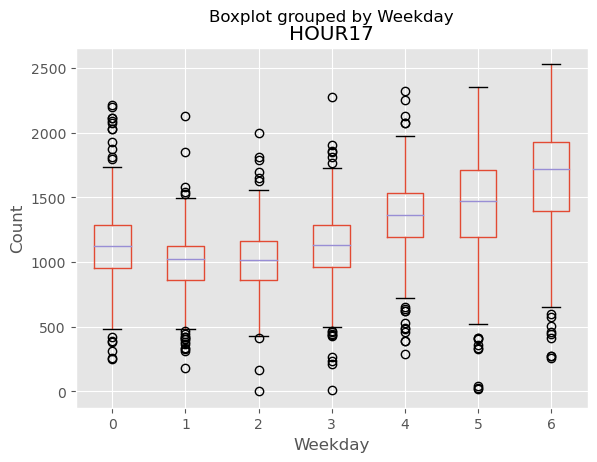

In [166]:
Box = Eisenhower_East[['Weekday', 'HOUR17']]
Box.boxplot(by = 'Weekday', column = 'HOUR17')
plt.ylabel('Count')

In [745]:
fig = px.violin(Eisenhower_West, y="HOUR16", x="Weekday", color = 'Weekday', box=True, points="all", 
                hover_data= Eisenhower_West.columns)
fig.show()

In [749]:
import plotly.express as px

fig = px.violin(Eisenhower_East, y="HOUR10", x="Weekday", color = 'Weekday', box=True, points="all", 
                hover_data= Eisenhower_East.columns)
fig.show()

<Axes: xlabel='Weekday'>

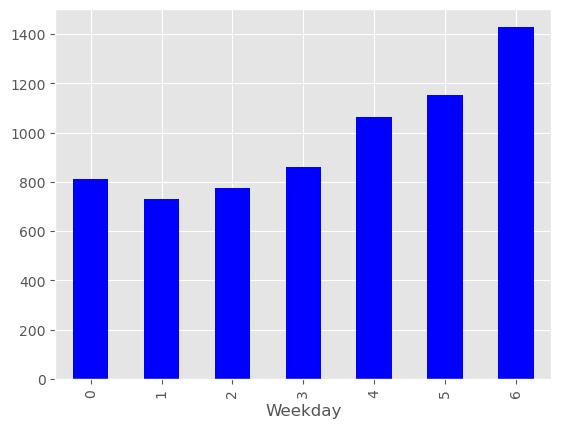

In [120]:
Eisenhower_East.groupby('Weekday')['HOUR18'].median().plot.bar(color = 'b')

C:\Users\Natalie\AppData\Local\Temp\ipykernel_24004\4047892114.py:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

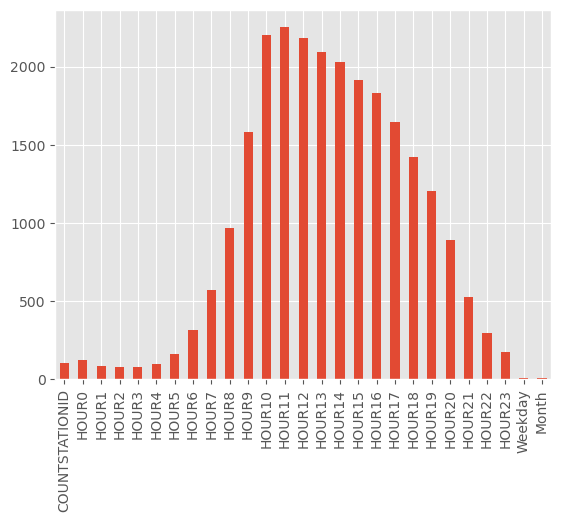

In [152]:
Eisenhower_East.loc[Eisenhower_East.Weekday == 6].mean().plot.bar()

C:\Users\Natalie\AppData\Local\Temp\ipykernel_24004\438003381.py:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

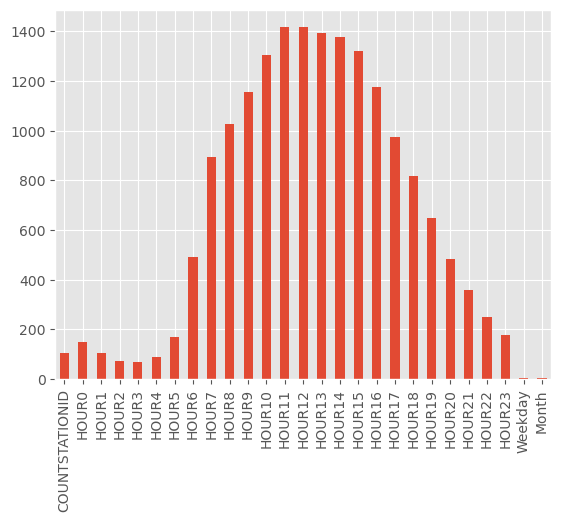

In [151]:
Eisenhower_West.loc[Eisenhower_West.Weekday == 6].mean().plot.bar()

In [34]:
Eisenhower_West.loc[Eisenhower_West.Month =  1 or 2 or 3]

SyntaxError: invalid syntax (538405807.py, line 1)